In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Converting the image to B/W
x_train[x_train < 127] = 0
x_train[x_train >= 127] = 1
x_test[x_test < 127] = 0
x_test[x_test >= 127] = 1

# For the greyscale images
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_orig_train = np.copy(y_train)
y_orig_test = np.copy(y_test)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# Training the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


  128/60000 [..............................] - ETA: 3313s - loss: 2.3090 - acc: 0.1016

  384/60000 [..............................] - ETA: 1111s - loss: 2.2364 - acc: 0.2240

  640/60000 [..............................] - ETA: 670s - loss: 2.1736 - acc: 0.2766 

  896/60000 [..............................] - ETA: 481s - loss: 2.0855 - acc: 0.3237

 1152/60000 [..............................] - ETA: 376s - loss: 2.0011 - acc: 0.3524

 1408/60000 [..............................] - ETA: 309s - loss: 1.9261 - acc: 0.3849

 1664/60000 [..............................] - ETA: 262s - loss: 1.8614 - acc: 0.4056

 1920/60000 [..............................] - ETA: 228s - loss: 1.7890 - acc: 0.4260

 2176/60000 [>.............................] - ETA: 202s - loss: 1.7168 - acc: 0.4527

 2432/60000 [>.............................] - ETA: 182s - loss: 1.6531 - acc: 0.4753

 2688/60000 [>.............................] - ETA: 165s - loss: 1.5959 - acc: 0.4940

 2944/60000 [>.............................] - ETA: 151s - loss: 1.5557 - acc: 0.5041

 3200/60000 [>.............................] - ETA: 140s - loss: 1.4985 - acc: 0.5241

 3456/60000 [>.............................] - ETA: 130s - loss: 1.4459 - acc: 0.5405

 3712/60000 [>.............................] - ETA: 122s - loss: 1.4215 - acc: 0.5480

 3968/60000 [>.............................] - ETA: 114s - loss: 1.3854 - acc: 0.5575

 4224/60000 [=>............................] - ETA: 108s - loss: 1.3425 - acc: 0.5734

 4480/60000 [=>............................] - ETA: 102s - loss: 1.3099 - acc: 0.5859

 4736/60000 [=>............................] - ETA: 97s - loss: 1.2727 - acc: 0.5976 

 4992/60000 [=>............................] - ETA: 92s - loss: 1.2410 - acc: 0.6070

 5248/60000 [=>............................] - ETA: 88s - loss: 1.2183 - acc: 0.6138

 5504/60000 [=>............................] - ETA: 84s - loss: 1.1967 - acc: 0.6214

 5760/60000 [=>............................] - ETA: 81s - loss: 1.1707 - acc: 0.6306

 6016/60000 [==>...........................] - ETA: 77s - loss: 1.1468 - acc: 0.6390

 6272/60000 [==>...........................] - ETA: 74s - loss: 1.1240 - acc: 0.6462

 6528/60000 [==>...........................] - ETA: 72s - loss: 1.1005 - acc: 0.6536

 6784/60000 [==>...........................] - ETA: 69s - loss: 1.0777 - acc: 0.6605

 7040/60000 [==>...........................] - ETA: 67s - loss: 1.0629 - acc: 0.6653

 7296/60000 [==>...........................] - ETA: 65s - loss: 1.0459 - acc: 0.6704

 7552/60000 [==>...........................] - ETA: 63s - loss: 1.0310 - acc: 0.6751

 7808/60000 [==>...........................] - ETA: 61s - loss: 1.0129 - acc: 0.6814

 8064/60000 [===>..........................] - ETA: 59s - loss: 0.9998 - acc: 0.6863

 8320/60000 [===>..........................] - ETA: 57s - loss: 0.9840 - acc: 0.6911

 8576/60000 [===>..........................] - ETA: 56s - loss: 0.9712 - acc: 0.6953

 8832/60000 [===>..........................] - ETA: 54s - loss: 0.9612 - acc: 0.6981

 9088/60000 [===>..........................] - ETA: 53s - loss: 0.9481 - acc: 0.7025

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.9361 - acc: 0.7060

 9600/60000 [===>..........................] - ETA: 50s - loss: 0.9249 - acc: 0.7097

 9856/60000 [===>..........................] - ETA: 49s - loss: 0.9122 - acc: 0.7139

10112/60000 [====>.........................] - ETA: 48s - loss: 0.9010 - acc: 0.7178

10368/60000 [====>.........................] - ETA: 47s - loss: 0.8880 - acc: 0.7222



10624/60000 [====>.........................] - ETA: 46s - loss: 0.8788 - acc: 0.7252

10880/60000 [====>.........................] - ETA: 45s - loss: 0.8688 - acc: 0.7283

11136/60000 [====>.........................] - ETA: 44s - loss: 0.8571 - acc: 0.7320

11392/60000 [====>.........................] - ETA: 43s - loss: 0.8476 - acc: 0.7353

11648/60000 [====>.........................] - ETA: 42s - loss: 0.8418 - acc: 0.7369

11904/60000 [====>.........................] - ETA: 41s - loss: 0.8341 - acc: 0.7396

12160/60000 [=====>........................] - ETA: 40s - loss: 0.8260 - acc: 0.7427

12416/60000 [=====>........................] - ETA: 39s - loss: 0.8187 - acc: 0.7452

12672/60000 [=====>........................] - ETA: 39s - loss: 0.8092 - acc: 0.7486

12928/60000 [=====>........................] - ETA: 38s - loss: 0.8018 - acc: 0.7515

13184/60000 [=====>........................] - ETA: 37s - loss: 0.7923 - acc: 0.7550

13440/60000 [=====>........................] - ETA: 36s - loss: 0.7844 - acc: 0.7575

13696/60000 [=====>........................] - ETA: 36s - loss: 0.7784 - acc: 0.7593

13952/60000 [=====>........................] - ETA: 35s - loss: 0.7709 - acc: 0.7611

14208/60000 [======>.......................] - ETA: 35s - loss: 0.7642 - acc: 0.7634

14464/60000 [======>.......................] - ETA: 34s - loss: 0.7576 - acc: 0.7656

14720/60000 [======>.......................] - ETA: 33s - loss: 0.7515 - acc: 0.7673

14976/60000 [======>.......................] - ETA: 33s - loss: 0.7455 - acc: 0.7690

15232/60000 [======>.......................] - ETA: 32s - loss: 0.7381 - acc: 0.7716

15488/60000 [======>.......................] - ETA: 32s - loss: 0.7337 - acc: 0.7730

15744/60000 [======>.......................] - ETA: 31s - loss: 0.7280 - acc: 0.7746

16000/60000 [=======>......................] - ETA: 31s - loss: 0.7210 - acc: 0.7765

16256/60000 [=======>......................] - ETA: 30s - loss: 0.7157 - acc: 0.7782

16512/60000 [=======>......................] - ETA: 30s - loss: 0.7097 - acc: 0.7800

16768/60000 [=======>......................] - ETA: 29s - loss: 0.7031 - acc: 0.7820

17024/60000 [=======>......................] - ETA: 29s - loss: 0.6978 - acc: 0.7835

17280/60000 [=======>......................] - ETA: 28s - loss: 0.6931 - acc: 0.7852

17536/60000 [=======>......................] - ETA: 28s - loss: 0.6870 - acc: 0.7869

17792/60000 [=======>......................] - ETA: 28s - loss: 0.6828 - acc: 0.7882

18048/60000 [========>.....................] - ETA: 27s - loss: 0.6794 - acc: 0.7892

18304/60000 [========>.....................] - ETA: 27s - loss: 0.6752 - acc: 0.7905

18560/60000 [========>.....................] - ETA: 26s - loss: 0.6706 - acc: 0.7921

18816/60000 [========>.....................] - ETA: 26s - loss: 0.6646 - acc: 0.7941

19072/60000 [========>.....................] - ETA: 26s - loss: 0.6587 - acc: 0.7961

19328/60000 [========>.....................] - ETA: 25s - loss: 0.6552 - acc: 0.7972

19584/60000 [========>.....................] - ETA: 25s - loss: 0.6515 - acc: 0.7983

19840/60000 [========>.....................] - ETA: 25s - loss: 0.6474 - acc: 0.7995

20096/60000 [=========>....................] - ETA: 24s - loss: 0.6425 - acc: 0.8011

20352/60000 [=========>....................] - ETA: 24s - loss: 0.6382 - acc: 0.8024

20608/60000 [=========>....................] - ETA: 24s - loss: 0.6346 - acc: 0.8036

20864/60000 [=========>....................] - ETA: 23s - loss: 0.6316 - acc: 0.8050

21120/60000 [=========>....................] - ETA: 23s - loss: 0.6277 - acc: 0.8063

21376/60000 [=========>....................] - ETA: 23s - loss: 0.6244 - acc: 0.8078

21632/60000 [=========>....................] - ETA: 22s - loss: 0.6204 - acc: 0.8090

21888/60000 [=========>....................] - ETA: 22s - loss: 0.6156 - acc: 0.8104

22144/60000 [==========>...................] - ETA: 22s - loss: 0.6118 - acc: 0.8116

22400/60000 [==========>...................] - ETA: 21s - loss: 0.6078 - acc: 0.8132

22656/60000 [==========>...................] - ETA: 21s - loss: 0.6031 - acc: 0.8145

22912/60000 [==========>...................] - ETA: 21s - loss: 0.5992 - acc: 0.8156

23168/60000 [==========>...................] - ETA: 21s - loss: 0.5955 - acc: 0.8168

23424/60000 [==========>...................] - ETA: 20s - loss: 0.5920 - acc: 0.8179

23680/60000 [==========>...................] - ETA: 20s - loss: 0.5886 - acc: 0.8187

23936/60000 [==========>...................] - ETA: 20s - loss: 0.5850 - acc: 0.8199

24192/60000 [===========>..................] - ETA: 20s - loss: 0.5818 - acc: 0.8208

24448/60000 [===========>..................] - ETA: 19s - loss: 0.5792 - acc: 0.8217

24704/60000 [===========>..................] - ETA: 19s - loss: 0.5757 - acc: 0.8228

24960/60000 [===========>..................] - ETA: 19s - loss: 0.5733 - acc: 0.8236

25216/60000 [===========>..................] - ETA: 19s - loss: 0.5708 - acc: 0.8245

25472/60000 [===========>..................] - ETA: 18s - loss: 0.5675 - acc: 0.8254

25728/60000 [===========>..................] - ETA: 18s - loss: 0.5645 - acc: 0.8264

25984/60000 [===========>..................] - ETA: 18s - loss: 0.5622 - acc: 0.8273

26240/60000 [============>.................] - ETA: 18s - loss: 0.5600 - acc: 0.8280

26496/60000 [============>.................] - ETA: 17s - loss: 0.5573 - acc: 0.8290

26752/60000 [============>.................] - ETA: 17s - loss: 0.5547 - acc: 0.8299

27008/60000 [============>.................] - ETA: 17s - loss: 0.5524 - acc: 0.8306

27264/60000 [============>.................] - ETA: 17s - loss: 0.5495 - acc: 0.8314

27520/60000 [============>.................] - ETA: 17s - loss: 0.5463 - acc: 0.8324

27776/60000 [============>.................] - ETA: 16s - loss: 0.5432 - acc: 0.8333

28032/60000 [=============>................] - ETA: 16s - loss: 0.5408 - acc: 0.8342

28288/60000 [=============>................] - ETA: 16s - loss: 0.5380 - acc: 0.8350

28544/60000 [=============>................] - ETA: 16s - loss: 0.5352 - acc: 0.8358

28800/60000 [=============>................] - ETA: 16s - loss: 0.5327 - acc: 0.8366

29056/60000 [=============>................] - ETA: 15s - loss: 0.5299 - acc: 0.8375

29312/60000 [=============>................] - ETA: 15s - loss: 0.5272 - acc: 0.8384

29568/60000 [=============>................] - ETA: 15s - loss: 0.5244 - acc: 0.8394

29824/60000 [=============>................] - ETA: 15s - loss: 0.5222 - acc: 0.8401

30080/60000 [==============>...............] - ETA: 15s - loss: 0.5198 - acc: 0.8410

30336/60000 [==============>...............] - ETA: 14s - loss: 0.5173 - acc: 0.8419

30592/60000 [==============>...............] - ETA: 14s - loss: 0.5152 - acc: 0.8425

30848/60000 [==============>...............] - ETA: 14s - loss: 0.5128 - acc: 0.8433

31104/60000 [==============>...............] - ETA: 14s - loss: 0.5101 - acc: 0.8441

31360/60000 [==============>...............] - ETA: 14s - loss: 0.5075 - acc: 0.8448

31616/60000 [==============>...............] - ETA: 13s - loss: 0.5054 - acc: 0.8455

31872/60000 [==============>...............] - ETA: 13s - loss: 0.5034 - acc: 0.8461

32128/60000 [===============>..............] - ETA: 13s - loss: 0.5013 - acc: 0.8467

32384/60000 [===============>..............] - ETA: 13s - loss: 0.4993 - acc: 0.8475

32640/60000 [===============>..............] - ETA: 13s - loss: 0.4969 - acc: 0.8482

32896/60000 [===============>..............] - ETA: 13s - loss: 0.4947 - acc: 0.8489

33152/60000 [===============>..............] - ETA: 12s - loss: 0.4927 - acc: 0.8495

33408/60000 [===============>..............] - ETA: 12s - loss: 0.4910 - acc: 0.8501

33664/60000 [===============>..............] - ETA: 12s - loss: 0.4885 - acc: 0.8509

33920/60000 [===============>..............] - ETA: 12s - loss: 0.4867 - acc: 0.8514

34176/60000 [================>.............] - ETA: 12s - loss: 0.4842 - acc: 0.8521

34432/60000 [================>.............] - ETA: 12s - loss: 0.4825 - acc: 0.8527

34688/60000 [================>.............] - ETA: 11s - loss: 0.4805 - acc: 0.8533

34944/60000 [================>.............] - ETA: 11s - loss: 0.4788 - acc: 0.8538

35200/60000 [================>.............] - ETA: 11s - loss: 0.4767 - acc: 0.8544

35456/60000 [================>.............] - ETA: 11s - loss: 0.4746 - acc: 0.8551

35712/60000 [================>.............] - ETA: 11s - loss: 0.4723 - acc: 0.8558

35968/60000 [================>.............] - ETA: 11s - loss: 0.4709 - acc: 0.8562

36224/60000 [=================>............] - ETA: 11s - loss: 0.4697 - acc: 0.8567

36480/60000 [=================>............] - ETA: 10s - loss: 0.4677 - acc: 0.8573

36736/60000 [=================>............] - ETA: 10s - loss: 0.4661 - acc: 0.8578

36992/60000 [=================>............] - ETA: 10s - loss: 0.4642 - acc: 0.8584

37248/60000 [=================>............] - ETA: 10s - loss: 0.4627 - acc: 0.8588

37504/60000 [=================>............] - ETA: 10s - loss: 0.4610 - acc: 0.8594

37760/60000 [=================>............] - ETA: 10s - loss: 0.4593 - acc: 0.8599

38016/60000 [==================>...........] - ETA: 10s - loss: 0.4577 - acc: 0.8605

38272/60000 [==================>...........] - ETA: 9s - loss: 0.4559 - acc: 0.8611 

38528/60000 [==================>...........] - ETA: 9s - loss: 0.4543 - acc: 0.8618

38784/60000 [==================>...........] - ETA: 9s - loss: 0.4531 - acc: 0.8622

39040/60000 [==================>...........] - ETA: 9s - loss: 0.4516 - acc: 0.8627

39296/60000 [==================>...........] - ETA: 9s - loss: 0.4502 - acc: 0.8630

39552/60000 [==================>...........] - ETA: 9s - loss: 0.4489 - acc: 0.8634

39808/60000 [==================>...........] - ETA: 9s - loss: 0.4473 - acc: 0.8638

40064/60000 [===================>..........] - ETA: 8s - loss: 0.4456 - acc: 0.8643

40320/60000 [===================>..........] - ETA: 8s - loss: 0.4439 - acc: 0.8648

40576/60000 [===================>..........] - ETA: 8s - loss: 0.4421 - acc: 0.8654

40832/60000 [===================>..........] - ETA: 8s - loss: 0.4403 - acc: 0.8658

41088/60000 [===================>..........] - ETA: 8s - loss: 0.4389 - acc: 0.8662

41344/60000 [===================>..........] - ETA: 8s - loss: 0.4374 - acc: 0.8667

41600/60000 [===================>..........] - ETA: 8s - loss: 0.4358 - acc: 0.8672

41856/60000 [===================>..........] - ETA: 7s - loss: 0.4344 - acc: 0.8676

42112/60000 [====================>.........] - ETA: 7s - loss: 0.4331 - acc: 0.8680

42368/60000 [====================>.........] - ETA: 7s - loss: 0.4317 - acc: 0.8686

42624/60000 [====================>.........] - ETA: 7s - loss: 0.4303 - acc: 0.8690

42880/60000 [====================>.........] - ETA: 7s - loss: 0.4288 - acc: 0.8694

43136/60000 [====================>.........] - ETA: 7s - loss: 0.4276 - acc: 0.8697

43392/60000 [====================>.........] - ETA: 7s - loss: 0.4263 - acc: 0.8701

43648/60000 [====================>.........] - ETA: 7s - loss: 0.4246 - acc: 0.8706

43904/60000 [====================>.........] - ETA: 6s - loss: 0.4233 - acc: 0.8710

44160/60000 [=====================>........] - ETA: 6s - loss: 0.4220 - acc: 0.8714

44416/60000 [=====================>........] - ETA: 6s - loss: 0.4208 - acc: 0.8717

44672/60000 [=====================>........] - ETA: 6s - loss: 0.4197 - acc: 0.8721

44928/60000 [=====================>........] - ETA: 6s - loss: 0.4183 - acc: 0.8724

45184/60000 [=====================>........] - ETA: 6s - loss: 0.4169 - acc: 0.8729

45440/60000 [=====================>........] - ETA: 6s - loss: 0.4155 - acc: 0.8733

45696/60000 [=====================>........] - ETA: 6s - loss: 0.4139 - acc: 0.8738

45952/60000 [=====================>........] - ETA: 5s - loss: 0.4129 - acc: 0.8741

46208/60000 [======================>.......] - ETA: 5s - loss: 0.4118 - acc: 0.8744

46464/60000 [======================>.......] - ETA: 5s - loss: 0.4109 - acc: 0.8746

46720/60000 [======================>.......] - ETA: 5s - loss: 0.4093 - acc: 0.8751

46976/60000 [======================>.......] - ETA: 5s - loss: 0.4081 - acc: 0.8756

47232/60000 [======================>.......] - ETA: 5s - loss: 0.4073 - acc: 0.8758

47488/60000 [======================>.......] - ETA: 5s - loss: 0.4060 - acc: 0.8761

47744/60000 [======================>.......] - ETA: 5s - loss: 0.4053 - acc: 0.8764

48000/60000 [=======================>......] - ETA: 4s - loss: 0.4039 - acc: 0.8768

48256/60000 [=======================>......] - ETA: 4s - loss: 0.4026 - acc: 0.8772

48512/60000 [=======================>......] - ETA: 4s - loss: 0.4014 - acc: 0.8776

48768/60000 [=======================>......] - ETA: 4s - loss: 0.4001 - acc: 0.8780

49024/60000 [=======================>......] - ETA: 4s - loss: 0.3992 - acc: 0.8782

49280/60000 [=======================>......] - ETA: 4s - loss: 0.3977 - acc: 0.8787

49536/60000 [=======================>......] - ETA: 4s - loss: 0.3968 - acc: 0.8790

49792/60000 [=======================>......] - ETA: 4s - loss: 0.3955 - acc: 0.8795

50048/60000 [========================>.....] - ETA: 4s - loss: 0.3943 - acc: 0.8799

50304/60000 [========================>.....] - ETA: 3s - loss: 0.3930 - acc: 0.8803

50560/60000 [========================>.....] - ETA: 3s - loss: 0.3921 - acc: 0.8806

50816/60000 [========================>.....] - ETA: 3s - loss: 0.3912 - acc: 0.8809

51072/60000 [========================>.....] - ETA: 3s - loss: 0.3901 - acc: 0.8813

51328/60000 [========================>.....] - ETA: 3s - loss: 0.3890 - acc: 0.8816

51584/60000 [========================>.....] - ETA: 3s - loss: 0.3879 - acc: 0.8819

51840/60000 [========================>.....] - ETA: 3s - loss: 0.3871 - acc: 0.8821

52096/60000 [=========================>....] - ETA: 3s - loss: 0.3858 - acc: 0.8825

52352/60000 [=========================>....] - ETA: 3s - loss: 0.3847 - acc: 0.8829

52608/60000 [=========================>....] - ETA: 2s - loss: 0.3834 - acc: 0.8833

52864/60000 [=========================>....] - ETA: 2s - loss: 0.3823 - acc: 0.8836

53120/60000 [=========================>....] - ETA: 2s - loss: 0.3809 - acc: 0.8841

53376/60000 [=========================>....] - ETA: 2s - loss: 0.3800 - acc: 0.8843

53632/60000 [=========================>....] - ETA: 2s - loss: 0.3793 - acc: 0.8844

53888/60000 [=========================>....] - ETA: 2s - loss: 0.3789 - acc: 0.8845

54144/60000 [==========================>...] - ETA: 2s - loss: 0.3781 - acc: 0.8848

54400/60000 [==========================>...] - ETA: 2s - loss: 0.3770 - acc: 0.8852

54656/60000 [==========================>...] - ETA: 2s - loss: 0.3763 - acc: 0.8854

54912/60000 [==========================>...] - ETA: 2s - loss: 0.3753 - acc: 0.8857

55168/60000 [==========================>...] - ETA: 1s - loss: 0.3742 - acc: 0.8860

55424/60000 [==========================>...] - ETA: 1s - loss: 0.3731 - acc: 0.8863

55680/60000 [==========================>...] - ETA: 1s - loss: 0.3719 - acc: 0.8867

55936/60000 [==========================>...] - ETA: 1s - loss: 0.3710 - acc: 0.8870

56192/60000 [===========================>..] - ETA: 1s - loss: 0.3701 - acc: 0.8873

56448/60000 [===========================>..] - ETA: 1s - loss: 0.3689 - acc: 0.8876

56704/60000 [===========================>..] - ETA: 1s - loss: 0.3679 - acc: 0.8879

56960/60000 [===========================>..] - ETA: 1s - loss: 0.3667 - acc: 0.8882

57216/60000 [===========================>..] - ETA: 1s - loss: 0.3659 - acc: 0.8885

57472/60000 [===========================>..] - ETA: 0s - loss: 0.3649 - acc: 0.8888

57728/60000 [===========================>..] - ETA: 0s - loss: 0.3637 - acc: 0.8892

57984/60000 [===========================>..] - ETA: 0s - loss: 0.3627 - acc: 0.8895

58240/60000 [============================>.] - ETA: 0s - loss: 0.3619 - acc: 0.8897

58496/60000 [============================>.] - ETA: 0s - loss: 0.3611 - acc: 0.8899

58752/60000 [============================>.] - ETA: 0s - loss: 0.3600 - acc: 0.8902

59008/60000 [============================>.] - ETA: 0s - loss: 0.3591 - acc: 0.8905

59264/60000 [============================>.] - ETA: 0s - loss: 0.3587 - acc: 0.8906

59520/60000 [============================>.] - ETA: 0s - loss: 0.3577 - acc: 0.8909

59776/60000 [============================>.] - ETA: 0s - loss: 0.3567 - acc: 0.8912

60000/60000 [==============================] - 24s - loss: 0.3558 - acc: 0.8916 - val_loss: 0.0900 - val_acc: 0.9731


Epoch 2/12
  128/60000 [..............................] - ETA: 20s - loss: 0.1225 - acc: 0.9453

  384/60000 [..............................] - ETA: 18s - loss: 0.1019 - acc: 0.9609

  640/60000 [..............................] - ETA: 17s - loss: 0.1018 - acc: 0.9625

  896/60000 [..............................] - ETA: 17s - loss: 0.1130 - acc: 0.9609

 1152/60000 [..............................] - ETA: 16s - loss: 0.1161 - acc: 0.9609

 1408/60000 [..............................] - ETA: 16s - loss: 0.1118 - acc: 0.9638

 1664/60000 [..............................] - ETA: 16s - loss: 0.1166 - acc: 0.9627

 1920/60000 [..............................] - ETA: 16s - loss: 0.1285 - acc: 0.9609

 2176/60000 [>.............................] - ETA: 15s - loss: 0.1319 - acc: 0.9577

 2432/60000 [>.............................] - ETA: 15s - loss: 0.1355 - acc: 0.9564

 2688/60000 [>.............................] - ETA: 15s - loss: 0.1408 - acc: 0.9539

 2944/60000 [>.............................] - ETA: 15s - loss: 0.1417 - acc: 0.9558

 3200/60000 [>.............................] - ETA: 15s - loss: 0.1392 - acc: 0.9563

 3456/60000 [>.............................] - ETA: 15s - loss: 0.1394 - acc: 0.9560

 3712/60000 [>.............................] - ETA: 15s - loss: 0.1356 - acc: 0.9574

 3968/60000 [>.............................] - ETA: 15s - loss: 0.1373 - acc: 0.9574

 4224/60000 [=>............................] - ETA: 15s - loss: 0.1338 - acc: 0.9579

 4480/60000 [=>............................] - ETA: 15s - loss: 0.1374 - acc: 0.9574

 4736/60000 [=>............................] - ETA: 15s - loss: 0.1364 - acc: 0.9573

 4992/60000 [=>............................] - ETA: 14s - loss: 0.1376 - acc: 0.9569

 5248/60000 [=>............................] - ETA: 14s - loss: 0.1380 - acc: 0.9566

 5504/60000 [=>............................] - ETA: 14s - loss: 0.1402 - acc: 0.9566

 5760/60000 [=>............................] - ETA: 14s - loss: 0.1384 - acc: 0.9571

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.1387 - acc: 0.9571

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.1378 - acc: 0.9573

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.1367 - acc: 0.9579

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.1356 - acc: 0.9581

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.1382 - acc: 0.9575

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.1390 - acc: 0.9574

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.1398 - acc: 0.9574

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.1402 - acc: 0.9571

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.1411 - acc: 0.9570

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.1428 - acc: 0.9566

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.1427 - acc: 0.9564

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.1449 - acc: 0.9557

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.1432 - acc: 0.9564

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.1417 - acc: 0.9569

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.1421 - acc: 0.9567

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.1409 - acc: 0.9569

10112/60000 [====>.........................] - ETA: 13s - loss: 0.1410 - acc: 0.9572

10368/60000 [====>.........................] - ETA: 13s - loss: 0.1413 - acc: 0.9574

10624/60000 [====>.........................] - ETA: 13s - loss: 0.1410 - acc: 0.9574

10880/60000 [====>.........................] - ETA: 13s - loss: 0.1410 - acc: 0.9571

11136/60000 [====>.........................] - ETA: 13s - loss: 0.1413 - acc: 0.9571

11392/60000 [====>.........................] - ETA: 13s - loss: 0.1403 - acc: 0.9572



11648/60000 [====>.........................] - ETA: 13s - loss: 0.1399 - acc: 0.9574

11904/60000 [====>.........................] - ETA: 13s - loss: 0.1398 - acc: 0.9574

12160/60000 [=====>........................] - ETA: 12s - loss: 0.1392 - acc: 0.9576



12416/60000 [=====>........................] - ETA: 12s - loss: 0.1395 - acc: 0.9576

12672/60000 [=====>........................] - ETA: 12s - loss: 0.1392 - acc: 0.9579

12928/60000 [=====>........................] - ETA: 12s - loss: 0.1394 - acc: 0.9577

13184/60000 [=====>........................] - ETA: 12s - loss: 0.1392 - acc: 0.9578

13440/60000 [=====>........................] - ETA: 12s - loss: 0.1394 - acc: 0.9576

13696/60000 [=====>........................] - ETA: 12s - loss: 0.1398 - acc: 0.9572

13952/60000 [=====>........................] - ETA: 12s - loss: 0.1397 - acc: 0.9572

14208/60000 [======>.......................] - ETA: 12s - loss: 0.1406 - acc: 0.9570

14464/60000 [======>.......................] - ETA: 12s - loss: 0.1404 - acc: 0.9570

14720/60000 [======>.......................] - ETA: 12s - loss: 0.1412 - acc: 0.9568

14976/60000 [======>.......................] - ETA: 12s - loss: 0.1419 - acc: 0.9568

15232/60000 [======>.......................] - ETA: 12s - loss: 0.1412 - acc: 0.9569

15488/60000 [======>.......................] - ETA: 11s - loss: 0.1422 - acc: 0.9568

15744/60000 [======>.......................] - ETA: 11s - loss: 0.1422 - acc: 0.9569

16000/60000 [=======>......................] - ETA: 11s - loss: 0.1422 - acc: 0.9568

16256/60000 [=======>......................] - ETA: 11s - loss: 0.1421 - acc: 0.9567

16512/60000 [=======>......................] - ETA: 11s - loss: 0.1419 - acc: 0.9568

16768/60000 [=======>......................] - ETA: 11s - loss: 0.1420 - acc: 0.9568

17024/60000 [=======>......................] - ETA: 11s - loss: 0.1423 - acc: 0.9566

17280/60000 [=======>......................] - ETA: 11s - loss: 0.1426 - acc: 0.9569

17536/60000 [=======>......................] - ETA: 11s - loss: 0.1424 - acc: 0.9569

17792/60000 [=======>......................] - ETA: 11s - loss: 0.1427 - acc: 0.9568

18048/60000 [========>.....................] - ETA: 11s - loss: 0.1420 - acc: 0.9571

18304/60000 [========>.....................] - ETA: 11s - loss: 0.1415 - acc: 0.9572

18560/60000 [========>.....................] - ETA: 11s - loss: 0.1407 - acc: 0.9574

18816/60000 [========>.....................] - ETA: 11s - loss: 0.1406 - acc: 0.9576

19072/60000 [========>.....................] - ETA: 11s - loss: 0.1402 - acc: 0.9576

19328/60000 [========>.....................] - ETA: 10s - loss: 0.1404 - acc: 0.9575

19584/60000 [========>.....................] - ETA: 10s - loss: 0.1396 - acc: 0.9577

19840/60000 [========>.....................] - ETA: 10s - loss: 0.1409 - acc: 0.9575

20096/60000 [=========>....................] - ETA: 10s - loss: 0.1408 - acc: 0.9577

20352/60000 [=========>....................] - ETA: 10s - loss: 0.1406 - acc: 0.9577

20608/60000 [=========>....................] - ETA: 10s - loss: 0.1408 - acc: 0.9577

20864/60000 [=========>....................] - ETA: 10s - loss: 0.1410 - acc: 0.9575

21120/60000 [=========>....................] - ETA: 10s - loss: 0.1413 - acc: 0.9575

21376/60000 [=========>....................] - ETA: 10s - loss: 0.1411 - acc: 0.9576

21632/60000 [=========>....................]

 - ETA: 10s - loss: 0.1420 - acc: 0.9575

21888/60000 [=========>....................] - ETA: 10s - loss: 0.1414 - acc: 0.9578

22144/60000 [==========>...................] - ETA: 10s - loss: 0.1409 - acc: 0.9580

22400/60000 [==========>...................] - ETA: 10s - loss: 0.1403 - acc: 0.9583

22656/60000 [==========>...................] - ETA: 10s - loss: 0.1401 - acc: 0.9584

22912/60000 [==========>...................] - ETA: 9s - loss: 0.1404 - acc: 0.9584 

23168/60000 [==========>...................] - ETA: 9s - loss: 0.1401 - acc: 0.9585

23424/60000 [==========>...................] - ETA: 9s - loss: 0.1403 - acc: 0.9585

23680/60000 [==========>...................] - ETA: 9s - loss: 0.1401 - acc: 0.9585

23936/60000 [==========>...................] - ETA: 9s - loss: 0.1403 - acc: 0.9583

24192/60000 [===========>..................] - ETA: 9s - loss: 0.1394 - acc: 0.9587

24448/60000 [===========>..................] - ETA: 9s - loss: 0.1398 - acc: 0.9586

24704/60000 [===========>..................] - ETA: 9s - loss: 0.1399 - acc: 0.9586

24960/60000 [===========>..................] - ETA: 9s - loss: 0.1401 - acc: 0.9586

25216/60000 [===========>..................] - ETA: 9s - loss: 0.1397 - acc: 0.9586

25472/60000 [===========>..................] - ETA: 9s - loss: 0.1397 - acc: 0.9587

25728/60000 [===========>..................] - ETA: 9s - loss: 0.1395 - acc: 0.9588

25984/60000 [===========>..................] - ETA: 9s - loss: 0.1392 - acc: 0.9588

26240/60000 [============>.................] - ETA: 9s - loss: 0.1392 - acc: 0.9588

26496/60000 [============>.................] - ETA: 8s - loss: 0.1393 - acc: 0.9587

26752/60000 [============>.................] - ETA: 8s - loss: 0.1387 - acc: 0.9588

27008/60000 [============>.................] - ETA: 8s - loss: 0.1387 - acc: 0.9589

27264/60000 [============>.................] - ETA: 8s - loss: 0.1387 - acc: 0.9589

27520/60000 [============>.................] - ETA: 8s - loss: 0.1385 - acc: 0.9589

27776/60000 [============>.................] - ETA: 8s - loss: 0.1385 - acc: 0.9589

28032/60000 [=============>................] - ETA: 8s - loss: 0.1385 - acc: 0.9589

28288/60000 [=============>................] - ETA: 8s - loss: 0.1382 - acc: 0.9590

28544/60000 [=============>................] - ETA: 8s - loss: 0.1378 - acc: 0.9592

28800/60000 [=============>................] - ETA: 8s - loss: 0.1371 - acc: 0.9593

29056/60000 [=============>................] - ETA: 8s - loss: 0.1366 - acc: 0.9595

29312/60000 [=============>................] - ETA: 8s - loss: 0.1359 - acc: 0.9597

29568/60000 [=============>................] - ETA: 8s - loss: 0.1359 - acc: 0.9597

29824/60000 [=============>................] - ETA: 8s - loss: 0.1353 - acc: 0.9599

30080/60000 [==============>...............] - ETA: 8s - loss: 0.1350 - acc: 0.9600

30336/60000 [==============>...............] - ETA: 7s - loss: 0.1349 - acc: 0.9601

30592/60000 [==============>...............] - ETA: 7s - loss: 0.1349 - acc: 0.9600

30848/60000 [==============>...............] - ETA: 7s - loss: 0.1350 - acc: 0.9598

31104/60000 [==============>...............] - ETA: 7s - loss: 0.1351 - acc: 0.9599

31360/60000 [==============>...............] - ETA: 7s - loss: 0.1346 - acc: 0.9600

31616/60000 [==============>...............] - ETA: 7s - loss: 0.1343 - acc: 0.9601

31872/60000 [==============>...............] - ETA: 7s - loss: 0.1337 - acc: 0.9603

32128/60000 [===============>..............] - ETA: 7s - loss: 0.1338 - acc: 0.9602

32384/60000 [===============>..............] - ETA: 7s - loss: 0.1333 - acc: 0.9603

32640/60000 [===============>..............] - ETA: 7s - loss: 0.1333 - acc: 0.9603

32896/60000 [===============>..............] - ETA: 7s - loss: 0.1331 - acc: 0.9603

33152/60000 [===============>..............] - ETA: 7s - loss: 0.1332 - acc: 0.9603

33408/60000 [===============>..............] - ETA: 7s - loss: 0.1330 - acc: 0.9604

33664/60000 [===============>..............] - ETA: 7s - loss: 0.1328 - acc: 0.9604

33920/60000 [===============>..............] - ETA: 6s - loss: 0.1335 - acc: 0.9603



34176/60000 [================>.............] - ETA: 6s - loss: 0.1332 - acc: 0.9604

34432/60000 [================>.............] - ETA: 6s - loss: 0.1332 - acc: 0.9604

34688/60000 [================>.............] - ETA: 6s - loss: 0.1329 - acc: 0.9605

34944/60000 [================>.............] - ETA: 6s - loss: 0.1329 - acc: 0.9605

35200/60000 [================>.............] - ETA: 6s - loss: 0.1326 - acc: 0.9606

35456/60000 [================>.............] - ETA: 6s - loss: 0.1324 - acc: 0.9606

35712/60000 [================>.............] - ETA: 6s - loss: 0.1323 - acc: 0.9607

35968/60000 [================>.............] - ETA: 6s - loss: 0.1319 - acc: 0.9608

36224/60000 [=================>............] - ETA: 6s - loss: 0.1319 - acc: 0.9607

36480/60000 [=================>............] - ETA: 6s - loss: 0.1323 - acc: 0.9607

36736/60000 [=================>............] - ETA: 6s - loss: 0.1319 - acc: 0.9608

36992/60000 [=================>............] - ETA: 6s - loss: 0.1316 - acc: 0.9609

37248/60000 [=================>............] - ETA: 6s - loss: 0.1314 - acc: 0.9609

37504/60000 [=================>............] - ETA: 6s - loss: 0.1315 - acc: 0.9609

37760/60000 [=================>............] - ETA: 5s - loss: 0.1313 - acc: 0.9609

38016/60000 [==================>...........] - ETA: 5s - loss: 0.1316 - acc: 0.9608

38272/60000 [==================>...........] - ETA: 5s - loss: 0.1313 - acc: 0.9609

38528/60000 [==================>...........] - ETA: 5s - loss: 0.1312 - acc: 0.9610

38784/60000 [==================>...........] - ETA: 5s - loss: 0.1309 - acc: 0.9611

39040/60000 [==================>...........] - ETA: 5s - loss: 0.1306 - acc: 0.9612

39296/60000 [==================>...........] - ETA: 5s - loss: 0.1304 - acc: 0.9612

39552/60000 [==================>...........] - ETA: 5s - loss: 0.1304 - acc: 0.9611

39808/60000 [==================>...........] - ETA: 5s - loss: 0.1305 - acc: 0.9610

40064/60000 [===================>..........] - ETA: 5s - loss: 0.1304 - acc: 0.9610

40320/60000 [===================>..........] - ETA: 5s - loss: 0.1306 - acc: 0.9609

40576/60000 [===================>..........] - ETA: 5s - loss: 0.1308 - acc: 0.9608

40832/60000 [===================>..........] - ETA: 5s - loss: 0.1307 - acc: 0.9608

41088/60000 [===================>..........] - ETA: 5s - loss: 0.1309 - acc: 0.9608

41344/60000 [===================>..........] - ETA: 4s - loss: 0.1310 - acc: 0.9608

41600/60000 [===================>..........] - ETA: 4s - loss: 0.1310 - acc: 0.9608

41856/60000 [===================>..........] - ETA: 4s - loss: 0.1308 - acc: 0.9609

42112/60000 [====================>.........] - ETA: 4s - loss: 0.1308 - acc: 0.9609

42368/60000 [====================>.........] - ETA: 4s - loss: 0.1309 - acc: 0.9608

42624/60000 [====================>.........] - ETA: 4s - loss: 0.1305 - acc: 0.9609

42880/60000 [====================>.........] - ETA: 4s - loss: 0.1300 - acc: 0.9611

43136/60000 [====================>.........] - ETA: 4s - loss: 0.1301 - acc: 0.9610

43392/60000 [====================>.........] - ETA: 4s - loss: 0.1300 - acc: 0.9610

43648/60000 [====================>.........]

 - ETA: 4s - loss: 0.1298 - acc: 0.9611

43904/60000 [====================>.........] - ETA: 4s - loss: 0.1299 - acc: 0.9610

44160/60000 [=====================>........] - ETA: 4s - loss: 0.1300 - acc: 0.9610

44416/60000 [=====================>........] - ETA: 4s - loss: 0.1297 - acc: 0.9611

44672/60000 [=====================>........] - ETA: 4s - loss: 0.1295 - acc: 0.9611

44928/60000 [=====================>........] - ETA: 4s - loss: 0.1293 - acc: 0.9612

45184/60000 [=====================>........] - ETA: 3s - loss: 0.1292 - acc: 0.9612

45440/60000 [=====================>........] - ETA: 3s - loss: 0.1290 - acc: 0.9613

45696/60000 [=====================>........] - ETA: 3s - loss: 0.1288 - acc: 0.9613

45952/60000 [=====================>........] - ETA: 3s - loss: 0.1291 - acc: 0.9612

46208/60000 [======================>.......] - ETA: 3s - loss: 0.1287 - acc: 0.9613

46464/60000 [======================>.......] - ETA: 3s - loss: 0.1285 - acc: 0.9614

46720/60000 [======================>.......] - ETA: 3s - loss: 0.1286 - acc: 0.9614

46976/60000 [======================>.......] - ETA: 3s - loss: 0.1288 - acc: 0.9614

47232/60000 [======================>.......] - ETA: 3s - loss: 0.1290 - acc: 0.9614

47488/60000 [======================>.......] - ETA: 3s - loss: 0.1289 - acc: 0.9614

47744/60000 [======================>.......] - ETA: 3s - loss: 0.1288 - acc: 0.9614

48000/60000 [=======================>......] - ETA: 3s - loss: 0.1287 - acc: 0.9614

48256/60000 [=======================>......] - ETA: 3s - loss: 0.1285 - acc: 0.9615

48512/60000 [=======================>......] - ETA: 3s - loss: 0.1285 - acc: 0.9614

48768/60000 [=======================>......] - ETA: 2s - loss: 0.1286 - acc: 0.9615

49024/60000 [=======================>......] - ETA: 2s - loss: 0.1283 - acc: 0.9615



49280/60000 [=======================>......] - ETA: 2s - loss: 0.1282 - acc: 0.9615

49536/60000 [=======================>......] - ETA: 2s - loss: 0.1279 - acc: 0.9616

49792/60000 [=======================>......] - ETA: 2s - loss: 0.1278 - acc: 0.9617

50048/60000 [========================>.....] - ETA: 2s - loss: 0.1276 - acc: 0.9618

50304/60000 [========================>.....] - ETA: 2s - loss: 0.1278 - acc: 0.9617

50560/60000 [========================>.....] - ETA: 2s - loss: 0.1277 - acc: 0.9617

50816/60000 [========================>.....] - ETA: 2s - loss: 0.1275 - acc: 0.9617

51072/60000 [========================>.....] - ETA: 2s - loss: 0.1273 - acc: 0.9617

51328/60000 [========================>.....] - ETA: 2s - loss: 0.1276 - acc: 0.9617

51584/60000 [========================>.....] - ETA: 2s - loss: 0.1275 - acc: 0.9618

51840/60000 [========================>.....] - ETA: 2s - loss: 0.1274 - acc: 0.9618

52096/60000 [=========================>....] - ETA: 2s - loss: 0.1273 - acc: 0.9619

52352/60000 [=========================>....] - ETA: 2s - loss: 0.1273 - acc: 0.9619

52608/60000 [=========================>....] - ETA: 1s - loss: 0.1272 - acc: 0.9619

52864/60000 [=========================>....] - ETA: 1s - loss: 0.1272 - acc: 0.9618

53120/60000 [=========================>....] - ETA: 1s - loss: 0.1271 - acc: 0.9618



53376/60000 [=========================>....] - ETA: 1s - loss: 0.1270 - acc: 0.9618

53632/60000 [=========================>....] - ETA: 1s - loss: 0.1272 - acc: 0.9618

53888/60000 [=========================>....] - ETA: 1s - loss: 0.1270 - acc: 0.9619

54144/60000 [==========================>...] - ETA: 1s - loss: 0.1269 - acc: 0.9619



54400/60000 [==========================>...] - ETA: 1s - loss: 0.1271 - acc: 0.9617

54656/60000 [==========================>...] - ETA: 1s - loss: 0.1271 - acc: 0.9618

54912/60000 [==========================>...] - ETA: 1s - loss: 0.1271 - acc: 0.9618

55168/60000 [==========================>...] - ETA: 1s - loss: 0.1271 - acc: 0.9618

55424/60000 [==========================>...] - ETA: 1s - loss: 0.1269 - acc: 0.9619

55680/60000 [==========================>...] - ETA: 1s - loss: 0.1270 - acc: 0.9618

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1269 - acc: 0.9619

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1269 - acc: 0.9619

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1267 - acc: 0.9620

56704/60000 [===========================>..] - ETA: 0s - loss: 0.1264 - acc: 0.9621

56960/60000 [===========================>..] - ETA: 0s - loss: 0.1261 - acc: 0.9622



57216/60000 [===========================>..] - ETA: 0s - loss: 0.1258 - acc: 0.9623

57472/60000 [===========================>..] - ETA: 0s - loss: 0.1255 - acc: 0.9624

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1254 - acc: 0.9624

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1255 - acc: 0.9624

58240/60000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9624

58496/60000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9624

58752/60000 [============================>.] - ETA: 0s - loss: 0.1253 - acc: 0.9625

59008/60000 [============================>.] - ETA: 0s - loss: 0.1253 - acc: 0.9624

59264/60000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9625

59520/60000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9624

59776/60000 [============================>.] - ETA: 0s - loss: 0.1255 - acc: 0.9625

60000/60000 [==============================] - 16s - loss: 0.1253 - acc: 0.9625 - val_loss: 0.0588 - val_acc: 0.9812


Epoch 3/12
  128/60000 [..............................] - ETA: 17s - loss: 0.1974 - acc: 0.9609

  384/60000 [..............................] - ETA: 17s - loss: 0.1438 - acc: 0.9661

  640/60000 [..............................] - ETA: 16s - loss: 0.1333 - acc: 0.9672

  896/60000 [..............................] - ETA: 16s - loss: 0.1295 - acc: 0.9654

 1152/60000 [..............................] - ETA: 15s - loss: 0.1269 - acc: 0.9627

 1408/60000 [..............................] - ETA: 15s - loss: 0.1145 - acc: 0.9680

 1664/60000 [..............................] - ETA: 15s - loss: 0.1191 - acc: 0.9681

 1920/60000 [..............................] - ETA: 15s - loss: 0.1192 - acc: 0.9672

 2176/60000 [>.............................] - ETA: 15s - loss: 0.1250 - acc: 0.9642

 2432/60000 [>.............................] - ETA: 15s - loss: 0.1305 - acc: 0.9630



 2688/60000 [>.............................] - ETA: 15s - loss: 0.1251 - acc: 0.9643

 2944/60000 [>.............................] - ETA: 15s - loss: 0.1210 - acc: 0.9650

 3200/60000 [>.............................] - ETA: 15s - loss: 0.1221 - acc: 0.9644

 3456/60000 [>.............................] - ETA: 15s - loss: 0.1244 - acc: 0.9641

 3712/60000 [>.............................] - ETA: 14s - loss: 0.1218 - acc: 0.9644

 3968/60000 [>.............................] - ETA: 14s - loss: 0.1197 - acc: 0.9652

 4224/60000 [=>............................] - ETA: 14s - loss: 0.1220 - acc: 0.9647

 4480/60000 [=>............................] - ETA: 14s - loss: 0.1212 - acc: 0.9645

 4736/60000 [=>............................] - ETA: 14s - loss: 0.1193 - acc: 0.9649

 4992/60000 [=>............................] - ETA: 14s - loss: 0.1170 - acc: 0.9659

 5248/60000 [=>............................] - ETA: 14s - loss: 0.1153 - acc: 0.9665

 5504/60000 [=>............................] - ETA: 14s - loss: 0.1145 - acc: 0.9668

 5760/60000 [=>............................] - ETA: 14s - loss: 0.1127 - acc: 0.9668

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.1125 - acc: 0.9674

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.1124 - acc: 0.9673

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.1126 - acc: 0.9671

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.1109 - acc: 0.9674

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.1098 - acc: 0.9675

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.1096 - acc: 0.9671

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.1097 - acc: 0.9672

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.1084 - acc: 0.9673

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.1072 - acc: 0.9676

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.1060 - acc: 0.9681

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.1049 - acc: 0.9685

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.1033 - acc: 0.9691

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.1022 - acc: 0.9693

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.1031 - acc: 0.9691

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.1028 - acc: 0.9691

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.1031 - acc: 0.9688

10112/60000 [====>.........................] - ETA: 13s - loss: 0.1022 - acc: 0.9690

10368/60000 [====>.........................] - ETA: 13s - loss: 0.1009 - acc: 0.9696

10624/60000 [====>.........................] - ETA: 13s - loss: 0.1006 - acc: 0.9699

10880/60000 [====>.........................] - ETA: 13s - loss: 0.1010 - acc: 0.9699

11136/60000 [====>.........................] - ETA: 13s - loss: 0.1014 - acc: 0.9699

11392/60000 [====>.........................] - ETA: 12s - loss: 0.1023 - acc: 0.9697

11648/60000 [====>.........................] - ETA: 12s - loss: 0.1015 - acc: 0.9701

11904/60000 [====>.........................] - ETA: 12s - loss: 0.1014 - acc: 0.9702

12160/60000 [=====>........................] - ETA: 12s - loss: 0.1008 - acc: 0.9702

12416/60000 [=====>........................] - ETA: 12s - loss: 0.1003 - acc: 0.9703

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0992 - acc: 0.9705

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0991 - acc: 0.9701

13184/60000 [=====>........................] - ETA: 12s - loss: 0.1002 - acc: 0.9703

13440/60000 [=====>........................] - ETA: 12s - loss: 0.1011 - acc: 0.9702

13696/60000 [=====>........................] - ETA: 12s - loss: 0.1003 - acc: 0.9704

13952/60000 [=====>........................] - ETA: 12s - loss: 0.1008 - acc: 0.9703

14208/60000 [======>.......................] - ETA: 12s - loss: 0.1004 - acc: 0.9704

14464/60000 [======>.......................] - ETA: 12s - loss: 0.1004 - acc: 0.9704

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0999 - acc: 0.9707

14976/60000 [======>.......................] - ETA: 12s - loss: 0.1003 - acc: 0.9704

15232/60000 [======>.......................] - ETA: 11s - loss: 0.1003 - acc: 0.9703

15488/60000 [======>.......................] - ETA: 11s - loss: 0.1003 - acc: 0.9704

15744/60000 [======>.......................] - ETA: 11s - loss: 0.1009 - acc: 0.9701

16000/60000 [=======>......................] - ETA: 11s - loss: 0.1013 - acc: 0.9701

16256/60000 [=======>......................] - ETA: 11s - loss: 0.1019 - acc: 0.9699

16512/60000 [=======>......................] - ETA: 11s - loss: 0.1015 - acc: 0.9699

16768/60000 [=======>......................] - ETA: 11s - loss: 0.1018 - acc: 0.9699

17024/60000 [=======>......................] - ETA: 11s - loss: 0.1010 - acc: 0.9701

17280/60000 [=======>......................] - ETA: 11s - loss: 0.1015 - acc: 0.9701

17536/60000 [=======>......................] - ETA: 11s - loss: 0.1014 - acc: 0.9701

17792/60000 [=======>......................] - ETA: 11s - loss: 0.1014 - acc: 0.9702

18048/60000 [========>.....................] - ETA: 11s - loss: 0.1011 - acc: 0.9701

18304/60000 [========>.....................] - ETA: 11s - loss: 0.1014 - acc: 0.9701

18560/60000 [========>.....................] - ETA: 11s - loss: 0.1008 - acc: 0.9704

18816/60000 [========>.....................] - ETA: 11s - loss: 0.1002 - acc: 0.9706

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0999 - acc: 0.9704

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0997 - acc: 0.9705

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0999 - acc: 0.9704

19840/60000 [========>.....................] - ETA: 10s - loss: 0.1007 - acc: 0.9702

20096/60000 [=========>....................] - ETA: 10s - loss: 0.1006 - acc: 0.9703

20352/60000 [=========>....................] - ETA: 10s - loss: 0.1007 - acc: 0.9703

20608/60000 [=========>....................] - ETA: 10s - loss: 0.1005 - acc: 0.9703

20864/60000 [=========>....................] - ETA: 10s - loss: 0.1007 - acc: 0.9703

21120/60000 [=========>....................] - ETA: 10s - loss: 0.1003 - acc: 0.9704

21376/60000 [=========>....................] - ETA: 10s - loss: 0.1003 - acc: 0.9704

21632/60000 [=========>....................] - ETA: 10s - loss: 0.1007 - acc: 0.9704

21888/60000 [=========>....................] - ETA: 10s - loss: 0.1011 - acc: 0.9704

22144/60000 [==========>...................] - ETA: 10s - loss: 0.1012 - acc: 0.9704

22400/60000 [==========>...................] - ETA: 10s - loss: 0.1011 - acc: 0.9705

22656/60000 [==========>...................] - ETA: 10s - loss: 0.1009 - acc: 0.9705

22912/60000 [==========>...................] - ETA: 9s - loss: 0.1010 - acc: 0.9705 

23168/60000 [==========>...................] - ETA: 9s - loss: 0.1009 - acc: 0.9705

23424/60000 [==========>...................] - ETA: 9s - loss: 0.1011 - acc: 0.9705

23680/60000 [==========>...................] - ETA: 9s - loss: 0.1008 - acc: 0.9706

23936/60000 [==========>...................] - ETA: 9s - loss: 0.1014 - acc: 0.9706

24192/60000 [===========>..................] - ETA: 9s - loss: 0.1011 - acc: 0.9707

24448/60000 [===========>..................] - ETA: 9s - loss: 0.1010 - acc: 0.9707

24704/60000 [===========>..................] - ETA: 9s - loss: 0.1006 - acc: 0.9708

24960/60000 [===========>..................] - ETA: 9s - loss: 0.1000 - acc: 0.9710

25216/60000 [===========>..................] - ETA: 9s - loss: 0.1002 - acc: 0.9711

25472/60000 [===========>..................] - ETA: 9s - loss: 0.1015 - acc: 0.9708

25728/60000 [===========>..................] - ETA: 9s - loss: 0.1016 - acc: 0.9707

25984/60000 [===========>..................] - ETA: 9s - loss: 0.1016 - acc: 0.9708

26240/60000 [============>.................] - ETA: 9s - loss: 0.1014 - acc: 0.9708

26496/60000 [============>.................] - ETA: 9s - loss: 0.1015 - acc: 0.9706

26752/60000 [============>.................] - ETA: 8s - loss: 0.1015 - acc: 0.9707

27008/60000 [============>.................] - ETA: 8s - loss: 0.1015 - acc: 0.9707

27264/60000 [============>.................] - ETA: 8s - loss: 0.1011 - acc: 0.9708

27520/60000 [============>.................] - ETA: 8s - loss: 0.1011 - acc: 0.9708

27776/60000 [============>.................] - ETA: 8s - loss: 0.1008 - acc: 0.9709

28032/60000 [=============>................] - ETA: 8s - loss: 0.1006 - acc: 0.9709

28288/60000 [=============>................] - ETA: 8s - loss: 0.1003 - acc: 0.9710

28544/60000 [=============>................] - ETA: 8s - loss: 0.1001 - acc: 0.9710

28800/60000 [=============>................] - ETA: 8s - loss: 0.0998 - acc: 0.9710

29056/60000 [=============>................] - ETA: 8s - loss: 0.0994 - acc: 0.9712

29312/60000 [=============>................] - ETA: 8s - loss: 0.0995 - acc: 0.9712

29568/60000 [=============>................] - ETA: 8s - loss: 0.0995 - acc: 0.9712



29824/60000 [=============>................] - ETA: 8s - loss: 0.0995 - acc: 0.9711

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0995 - acc: 0.9712

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0993 - acc: 0.9711

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0988 - acc: 0.9713

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0990 - acc: 0.9713

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0991 - acc: 0.9713

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0990 - acc: 0.9713



31616/60000 [==============>...............] - ETA: 7s - loss: 0.0988 - acc: 0.9713

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0994 - acc: 0.9712

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0995 - acc: 0.9712

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0992 - acc: 0.9713

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0994 - acc: 0.9713

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0996 - acc: 0.9713

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0994 - acc: 0.9713

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0995 - acc: 0.9712

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0994 - acc: 0.9712

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0996 - acc: 0.9712

34176/60000 [================>.............] - ETA: 6s - loss: 0.0995 - acc: 0.9712

34432/60000 [================>.............] - ETA: 6s - loss: 0.0993 - acc: 0.9712

34688/60000 [================>.............] - ETA: 6s - loss: 0.0995 - acc: 0.9712

34944/60000 [================>.............] - ETA: 6s - loss: 0.0994 - acc: 0.9712

35200/60000 [================>.............] - ETA: 6s - loss: 0.0994 - acc: 0.9711

35456/60000 [================>.............] - ETA: 6s - loss: 0.0991 - acc: 0.9711

35712/60000 [================>.............] - ETA: 6s - loss: 0.0989 - acc: 0.9712

35968/60000 [================>.............] - ETA: 6s - loss: 0.0995 - acc: 0.9711

36224/60000 [=================>............] - ETA: 6s - loss: 0.0992 - acc: 0.9711

36480/60000 [=================>............] - ETA: 6s - loss: 0.0992 - acc: 0.9710

36736/60000 [=================>............] - ETA: 6s - loss: 0.0991 - acc: 0.9711

36992/60000 [=================>............] - ETA: 6s - loss: 0.0990 - acc: 0.9711

37248/60000 [=================>............] - ETA: 6s - loss: 0.0991 - acc: 0.9711

37504/60000 [=================>............] - ETA: 6s - loss: 0.0989 - acc: 0.9711

37760/60000 [=================>............] - ETA: 6s - loss: 0.0990 - acc: 0.9711

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0990 - acc: 0.9711

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0989 - acc: 0.9710

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0986 - acc: 0.9711

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0984 - acc: 0.9712

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0986 - acc: 0.9712

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0984 - acc: 0.9713

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0983 - acc: 0.9713

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0986 - acc: 0.9712

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0988 - acc: 0.9711

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0987 - acc: 0.9711

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0985 - acc: 0.9712

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0986 - acc: 0.9712

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0983 - acc: 0.9713

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0981 - acc: 0.9714

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0982 - acc: 0.9713

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0984 - acc: 0.9712

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0982 - acc: 0.9713

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0978 - acc: 0.9714

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0977 - acc: 0.9714

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0976 - acc: 0.9715

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0978 - acc: 0.9714

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0978 - acc: 0.9715

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0975 - acc: 0.9716

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0973 - acc: 0.9717

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0971 - acc: 0.9717

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0969 - acc: 0.9717

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0970 - acc: 0.9717

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0969 - acc: 0.9717

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0968 - acc: 0.9717

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0966 - acc: 0.9718

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0964 - acc: 0.9718

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0966 - acc: 0.9718

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0968 - acc: 0.9717

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0967 - acc: 0.9717

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0965 - acc: 0.9718

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0966 - acc: 0.9718

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0967 - acc: 0.9718

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0965 - acc: 0.9719

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0968 - acc: 0.9718

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0972 - acc: 0.9716

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0972 - acc: 0.9716

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0971 - acc: 0.9716

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0970 - acc: 0.9717

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0972 - acc: 0.9716

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0972 - acc: 0.9716

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0974 - acc: 0.9715

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0974 - acc: 0.9716

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0973 - acc: 0.9716

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0971 - acc: 0.9716

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0975 - acc: 0.9716

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0974 - acc: 0.9716

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0973 - acc: 0.9716

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0970 - acc: 0.9717

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0968 - acc: 0.9718

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0968 - acc: 0.9718

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0967 - acc: 0.9719

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0967 - acc: 0.9718

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0971 - acc: 0.9717

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0971 - acc: 0.9717

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0969 - acc: 0.9718

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0969 - acc: 0.9718

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0968 - acc: 0.9718

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0966 - acc: 0.9718

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0963 - acc: 0.9719

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0964 - acc: 0.9719

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0962 - acc: 0.9720

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0959 - acc: 0.9721

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0959 - acc: 0.9721

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0959 - acc: 0.9721

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0960 - acc: 0.9720

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0961 - acc: 0.9719

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0959 - acc: 0.9720

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0958 - acc: 0.9720

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0957 - acc: 0.9721

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0957 - acc: 0.9721

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0956 - acc: 0.9721

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0954 - acc: 0.9721

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0955 - acc: 0.9721

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0955 - acc: 0.9721

58240/60000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9721

58496/60000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9721

58752/60000 [============================>.] - ETA: 0s - loss: 0.0955 - acc: 0.9721

59008/60000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9721

59264/60000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9721

59520/60000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9722

59776/60000 [============================>.] - ETA: 0s - loss: 0.0952 - acc: 0.9722

60000/60000 [==============================] - 17s - loss: 0.0950 - acc: 0.9722 - val_loss: 0.0500 - val_acc: 0.9832


Epoch 4/12
  128/60000 [..............................] - ETA: 18s - loss: 0.0750 - acc: 0.9688

  384/60000 [..............................] - ETA: 17s - loss: 0.0982 - acc: 0.9688

  640/60000 [..............................] - ETA: 17s - loss: 0.0935 - acc: 0.9750

  896/60000 [..............................] - ETA: 16s - loss: 0.1005 - acc: 0.9743

 1152/60000 [..............................] - ETA: 16s - loss: 0.0915 - acc: 0.9766

 1408/60000 [..............................] - ETA: 16s - loss: 0.0933 - acc: 0.9744

 1664/60000 [..............................] - ETA: 16s - loss: 0.0877 - acc: 0.9760

 1920/60000 [..............................] - ETA: 16s - loss: 0.0858 - acc: 0.9755

 2176/60000 [>.............................] - ETA: 16s - loss: 0.0868 - acc: 0.9752

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0835 - acc: 0.9762

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0816 - acc: 0.9762

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0825 - acc: 0.9755

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0816 - acc: 0.9756

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0803 - acc: 0.9754

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0786 - acc: 0.9758

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0767 - acc: 0.9771

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0760 - acc: 0.9773

 4480/60000 [=>............................] - ETA: 15s - loss: 0.0768 - acc: 0.9777

 4736/60000 [=>............................] - ETA: 15s - loss: 0.0763 - acc: 0.9778

 4992/60000 [=>............................] - ETA: 15s - loss: 0.0761 - acc: 0.9782

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0749 - acc: 0.9785

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0750 - acc: 0.9786

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0748 - acc: 0.9780

 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0761 - acc: 0.9776

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0751 - acc: 0.9777

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0743 - acc: 0.9779

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0742 - acc: 0.9776

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0732 - acc: 0.9780

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0735 - acc: 0.9781

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0736 - acc: 0.9782

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0746 - acc: 0.9778

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0741 - acc: 0.9777

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0731 - acc: 0.9780

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0735 - acc: 0.9778

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0737 - acc: 0.9780

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0729 - acc: 0.9784

 9344/60000 [===>..........................]

 - ETA: 13s - loss: 0.0743 - acc: 0.9783

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0739 - acc: 0.9783

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0755 - acc: 0.9780

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0752 - acc: 0.9780

10368/60000 [====>.........................] - ETA: 13s - loss: 0.0742 - acc: 0.9783

10624/60000 [====>.........................] - ETA: 13s - loss: 0.0753 - acc: 0.9781

10880/60000 [====>.........................] - ETA: 13s - loss: 0.0753 - acc: 0.9782

11136/60000 [====>.........................] - ETA: 13s - loss: 0.0753 - acc: 0.9781



11392/60000 [====>.........................] - ETA: 13s - loss: 0.0760 - acc: 0.9779

11648/60000 [====>.........................] - ETA: 13s - loss: 0.0758 - acc: 0.9780

11904/60000 [====>.........................] - ETA: 13s - loss: 0.0778 - acc: 0.9778

12160/60000 [=====>........................] - ETA: 13s - loss: 0.0780 - acc: 0.9780

12416/60000 [=====>........................] - ETA: 13s - loss: 0.0789 - acc: 0.9777

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0779 - acc: 0.9781

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0776 - acc: 0.9782

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0779 - acc: 0.9779

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0783 - acc: 0.9777

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0791 - acc: 0.9776

13952/60000 [=====>........................] - ETA: 12s - loss: 0.0787 - acc: 0.9777

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0787 - acc: 0.9777

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0792 - acc: 0.9775

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0793 - acc: 0.9775

14976/60000 [======>.......................] - ETA: 12s - loss: 0.0794 - acc: 0.9775

15232/60000 [======>.......................] - ETA: 12s - loss: 0.0790 - acc: 0.9775

15488/60000 [======>.......................] - ETA: 12s - loss: 0.0789 - acc: 0.9776

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0792 - acc: 0.9776

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0789 - acc: 0.9776

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0787 - acc: 0.9776

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0783 - acc: 0.9778

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0783 - acc: 0.9777

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0784 - acc: 0.9776

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0781 - acc: 0.9775

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0780 - acc: 0.9775

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0784 - acc: 0.9772

18048/60000 [========>.....................] - ETA: 11s - loss: 0.0784 - acc: 0.9772

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0791 - acc: 0.9771

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0796 - acc: 0.9770

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0795 - acc: 0.9770

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0797 - acc: 0.9769

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0805 - acc: 0.9766

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0802 - acc: 0.9765

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0800 - acc: 0.9766

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0800 - acc: 0.9767

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0798 - acc: 0.9767

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0801 - acc: 0.9767

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0799 - acc: 0.9766

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0793 - acc: 0.9768

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0789 - acc: 0.9769

21632/60000 [=========>....................] - ETA: 10s - loss: 0.0789 - acc: 0.9768

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0791 - acc: 0.9766

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0786 - acc: 0.9767

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0789 - acc: 0.9767

22656/60000 [==========>...................] - ETA: 10s - loss: 0.0789 - acc: 0.9767

22912/60000 [==========>...................] - ETA: 10s - loss: 0.0793 - acc: 0.9767

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0796 - acc: 0.9766 

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0793 - acc: 0.9766

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0793 - acc: 0.9766

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0795 - acc: 0.9766

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0796 - acc: 0.9767

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0795 - acc: 0.9766

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0792 - acc: 0.9767

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0796 - acc: 0.9766

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0794 - acc: 0.9767

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0791 - acc: 0.9767

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0787 - acc: 0.9768

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0788 - acc: 0.9768

26240/60000 [============>.................] - ETA: 9s - loss: 0.0788 - acc: 0.9769

26496/60000 [============>.................] - ETA: 9s - loss: 0.0783 - acc: 0.9771

26752/60000 [============>.................] - ETA: 9s - loss: 0.0783 - acc: 0.9771

27008/60000 [============>.................] - ETA: 8s - loss: 0.0782 - acc: 0.9771

27264/60000 [============>.................] - ETA: 8s - loss: 0.0784 - acc: 0.9770

27520/60000 [============>.................] - ETA: 8s - loss: 0.0785 - acc: 0.9770

27776/60000 [============>.................] - ETA: 8s - loss: 0.0785 - acc: 0.9770

28032/60000 [=============>................] - ETA: 8s - loss: 0.0789 - acc: 0.9770

28288/60000 [=============>................] - ETA: 8s - loss: 0.0789 - acc: 0.9770

28544/60000 [=============>................] - ETA: 8s - loss: 0.0785 - acc: 0.9771

28800/60000 [=============>................] - ETA: 8s - loss: 0.0784 - acc: 0.9771

29056/60000 [=============>................] - ETA: 8s - loss: 0.0782 - acc: 0.9771

29312/60000 [=============>................] - ETA: 8s - loss: 0.0782 - acc: 0.9771

29568/60000 [=============>................] - ETA: 8s - loss: 0.0785 - acc: 0.9771

29824/60000 [=============>................] - ETA: 8s - loss: 0.0785 - acc: 0.9771

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0784 - acc: 0.9772

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0786 - acc: 0.9771

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0784 - acc: 0.9772

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0781 - acc: 0.9773

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0783 - acc: 0.9772

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0784 - acc: 0.9771

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0781 - acc: 0.9772

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0781 - acc: 0.9772

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0782 - acc: 0.9771

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0780 - acc: 0.9771

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0780 - acc: 0.9772

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0780 - acc: 0.9772

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0785 - acc: 0.9772

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0784 - acc: 0.9772

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0783 - acc: 0.9773

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0783 - acc: 0.9772

34176/60000 [================>.............] - ETA: 6s - loss: 0.0787 - acc: 0.9771

34432/60000 [================>.............] - ETA: 6s - loss: 0.0785 - acc: 0.9771

34688/60000 [================>.............] - ETA: 6s - loss: 0.0787 - acc: 0.9771

34944/60000 [================>.............]

 - ETA: 6s - loss: 0.0785 - acc: 0.9771

35200/60000 [================>.............] - ETA: 6s - loss: 0.0783 - acc: 0.9771

35456/60000 [================>.............] - ETA: 6s - loss: 0.0783 - acc: 0.9771

35712/60000 [================>.............] - ETA: 6s - loss: 0.0782 - acc: 0.9771

35968/60000 [================>.............] - ETA: 6s - loss: 0.0784 - acc: 0.9770

36224/60000 [=================>............] - ETA: 6s - loss: 0.0783 - acc: 0.9771

36480/60000 [=================>............] - ETA: 6s - loss: 0.0785 - acc: 0.9770

36736/60000 [=================>............] - ETA: 6s - loss: 0.0785 - acc: 0.9771

36992/60000 [=================>............] - ETA: 6s - loss: 0.0788 - acc: 0.9770

37248/60000 [=================>............] - ETA: 6s - loss: 0.0794 - acc: 0.9768

37504/60000 [=================>............] - ETA: 6s - loss: 0.0792 - acc: 0.9769

37760/60000 [=================>............] - ETA: 5s - loss: 0.0792 - acc: 0.9769

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0793 - acc: 0.9768

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0792 - acc: 0.9769



38528/60000 [==================>...........] - ETA: 5s - loss: 0.0796 - acc: 0.9768

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0795 - acc: 0.9768

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0796 - acc: 0.9768

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0794 - acc: 0.9768

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0796 - acc: 0.9768

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0793 - acc: 0.9769

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0794 - acc: 0.9769

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0795 - acc: 0.9768

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0794 - acc: 0.9769

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0796 - acc: 0.9768

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0796 - acc: 0.9768

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0794 - acc: 0.9768

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0796 - acc: 0.9767

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0797 - acc: 0.9767

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0796 - acc: 0.9767

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0795 - acc: 0.9767

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0793 - acc: 0.9767

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0792 - acc: 0.9767

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0793 - acc: 0.9767

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0792 - acc: 0.9767

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0794 - acc: 0.9767

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0793 - acc: 0.9767

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0794 - acc: 0.9767

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0795 - acc: 0.9766

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0795 - acc: 0.9766

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0794 - acc: 0.9767

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0795 - acc: 0.9767

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0797 - acc: 0.9766

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0795 - acc: 0.9767

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0794 - acc: 0.9767

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0793 - acc: 0.9767

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0790 - acc: 0.9768

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0788 - acc: 0.9769

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0789 - acc: 0.9769

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0791 - acc: 0.9768

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0789 - acc: 0.9769

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0789 - acc: 0.9768

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0789 - acc: 0.9768

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0791 - acc: 0.9768

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0792 - acc: 0.9768

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0792 - acc: 0.9769

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0790 - acc: 0.9769

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0791 - acc: 0.9769

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0790 - acc: 0.9769

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0788 - acc: 0.9770

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0791 - acc: 0.9770

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0791 - acc: 0.9770

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0790 - acc: 0.9770

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0789 - acc: 0.9771

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0788 - acc: 0.9771

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0789 - acc: 0.9770

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0789 - acc: 0.9770

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0789 - acc: 0.9769

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0789 - acc: 0.9769



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0789 - acc: 0.9769

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0790 - acc: 0.9768

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0788 - acc: 0.9769

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0787 - acc: 0.9770

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0784 - acc: 0.9770

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0783 - acc: 0.9770

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0784 - acc: 0.9770

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0784 - acc: 0.9771

54400/60000 [==========================>...]

 - ETA: 1s - loss: 0.0785 - acc: 0.9770

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0785 - acc: 0.9770

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0784 - acc: 0.9771

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0783 - acc: 0.9771

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0782 - acc: 0.9771

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0781 - acc: 0.9771

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0781 - acc: 0.9772

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0784 - acc: 0.9771

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0784 - acc: 0.9771

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0785 - acc: 0.9771

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0784 - acc: 0.9771

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0785 - acc: 0.9771

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0785 - acc: 0.9771

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0783 - acc: 0.9771



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0782 - acc: 0.9771

58240/60000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9771

58496/60000 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.9772

58752/60000 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.9772

59008/60000 [============================>.] - ETA: 0s - loss: 0.0780 - acc: 0.9772

59264/60000 [============================>.] - ETA: 0s - loss: 0.0780 - acc: 0.9772

59520/60000 [============================>.] - ETA: 0s - loss: 0.0779 - acc: 0.9772

59776/60000 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9772

60000/60000 [==============================] - 16s - loss: 0.0781 - acc: 0.9772 - val_loss: 0.0441 - val_acc: 0.9849


Epoch 5/12
  128/60000 [..............................] - ETA: 18s - loss: 0.0648 - acc: 0.9844

  384/60000 [..............................] - ETA: 17s - loss: 0.0711 - acc: 0.9740

  640/60000 [..............................] - ETA: 16s - loss: 0.0752 - acc: 0.9766

  896/60000 [..............................] - ETA: 16s - loss: 0.0723 - acc: 0.9754

 1152/60000 [..............................] - ETA: 16s - loss: 0.0638 - acc: 0.9800

 1408/60000 [..............................] - ETA: 15s - loss: 0.0627 - acc: 0.9794

 1664/60000 [..............................] - ETA: 15s - loss: 0.0758 - acc: 0.9784



 1920/60000 [..............................] - ETA: 15s - loss: 0.0698 - acc: 0.9797

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0808 - acc: 0.9770

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0769 - acc: 0.9786

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0778 - acc: 0.9788

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0748 - acc: 0.9786

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0713 - acc: 0.9797

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0750 - acc: 0.9786

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0750 - acc: 0.9782

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0773 - acc: 0.9763

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0815 - acc: 0.9749

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0799 - acc: 0.9754

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0806 - acc: 0.9745

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0791 - acc: 0.9746

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0791 - acc: 0.9747

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0782 - acc: 0.9753

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0776 - acc: 0.9755

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0762 - acc: 0.9761

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0771 - acc: 0.9761

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0753 - acc: 0.9770

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0772 - acc: 0.9769

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0755 - acc: 0.9773

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0747 - acc: 0.9775

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0740 - acc: 0.9775

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0736 - acc: 0.9778

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0779 - acc: 0.9773

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0770 - acc: 0.9776

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0764 - acc: 0.9778

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0751 - acc: 0.9781

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0739 - acc: 0.9785

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0730 - acc: 0.9785

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0736 - acc: 0.9782

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0741 - acc: 0.9782

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0731 - acc: 0.9784

10368/60000 [====>.........................] - ETA: 13s - loss: 0.0732 - acc: 0.9786

10624/60000 [====>.........................] - ETA: 13s - loss: 0.0727 - acc: 0.9787

10880/60000 [====>.........................] - ETA: 13s - loss: 0.0727 - acc: 0.9784

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0727 - acc: 0.9784

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0721 - acc: 0.9785

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0728 - acc: 0.9784

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0733 - acc: 0.9779

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0730 - acc: 0.9780

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0739 - acc: 0.9776

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0736 - acc: 0.9774

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0734 - acc: 0.9776

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0728 - acc: 0.9777

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0723 - acc: 0.9778

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0728 - acc: 0.9777

13952/60000 [=====>........................] - ETA: 12s - loss: 0.0722 - acc: 0.9779

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0725 - acc: 0.9777

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0724 - acc: 0.9776

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0719 - acc: 0.9777

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0712 - acc: 0.9779

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0710 - acc: 0.9780

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0720 - acc: 0.9777

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0720 - acc: 0.9777

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0719 - acc: 0.9777

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0720 - acc: 0.9777

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0717 - acc: 0.9778

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0718 - acc: 0.9779

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0720 - acc: 0.9777

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0713 - acc: 0.9781

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0710 - acc: 0.9782

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0710 - acc: 0.9781

18048/60000 [========>.....................] - ETA: 11s - loss: 0.0709 - acc: 0.9781

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0706 - acc: 0.9781

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0704 - acc: 0.9782

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0705 - acc: 0.9781

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0701 - acc: 0.9782

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0699 - acc: 0.9783

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0699 - acc: 0.9784

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0694 - acc: 0.9784

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0691 - acc: 0.9786

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0688 - acc: 0.9786

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0684 - acc: 0.9788

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0680 - acc: 0.9789

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0684 - acc: 0.9788

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0688 - acc: 0.9788

21632/60000 [=========>....................] - ETA: 10s - loss: 0.0687 - acc: 0.9788

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0684 - acc: 0.9789

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0689 - acc: 0.9788

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0686 - acc: 0.9789 

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0687 - acc: 0.9789

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0686 - acc: 0.9789

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0684 - acc: 0.9789

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0683 - acc: 0.9789



23680/60000 [==========>...................] - ETA: 9s - loss: 0.0685 - acc: 0.9788

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0684 - acc: 0.9788

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0686 - acc: 0.9788

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0688 - acc: 0.9788

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0685 - acc: 0.9789

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0686 - acc: 0.9788

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0686 - acc: 0.9787

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0683 - acc: 0.9788

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0681 - acc: 0.9788

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0677 - acc: 0.9789

26240/60000 [============>.................] - ETA: 8s - loss: 0.0674 - acc: 0.9790

26496/60000 [============>.................] - ETA: 8s - loss: 0.0671 - acc: 0.9791

26752/60000 [============>.................] - ETA: 8s - loss: 0.0672 - acc: 0.9790



27008/60000 [============>.................] - ETA: 8s - loss: 0.0678 - acc: 0.9789

27264/60000 [============>.................] - ETA: 8s - loss: 0.0688 - acc: 0.9786

27520/60000 [============>.................] - ETA: 8s - loss: 0.0686 - acc: 0.9787

27776/60000 [============>.................] - ETA: 8s - loss: 0.0686 - acc: 0.9787

28032/60000 [=============>................] - ETA: 8s - loss: 0.0689 - acc: 0.9786

28288/60000 [=============>................] - ETA: 8s - loss: 0.0688 - acc: 0.9786

28544/60000 [=============>................] - ETA: 8s - loss: 0.0689 - acc: 0.9786

28800/60000 [=============>................] - ETA: 8s - loss: 0.0691 - acc: 0.9786

29056/60000 [=============>................] - ETA: 8s - loss: 0.0696 - acc: 0.9784

29312/60000 [=============>................] - ETA: 8s - loss: 0.0695 - acc: 0.9783

29568/60000 [=============>................] - ETA: 8s - loss: 0.0692 - acc: 0.9784

29824/60000 [=============>................] - ETA: 7s - loss: 0.0694 - acc: 0.9784

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0697 - acc: 0.9783

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0697 - acc: 0.9782

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0694 - acc: 0.9783

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0693 - acc: 0.9784

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0696 - acc: 0.9784

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0694 - acc: 0.9784

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0692 - acc: 0.9784

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0691 - acc: 0.9785

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0690 - acc: 0.9786

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0691 - acc: 0.9785



32640/60000 [===============>..............] - ETA: 7s - loss: 0.0692 - acc: 0.9786

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0692 - acc: 0.9786

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0690 - acc: 0.9787

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0693 - acc: 0.9787

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0695 - acc: 0.9786

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0697 - acc: 0.9786

34176/60000 [================>.............] - ETA: 6s - loss: 0.0699 - acc: 0.9785

34432/60000 [================>.............] - ETA: 6s - loss: 0.0698 - acc: 0.9785

34688/60000 [================>.............] - ETA: 6s - loss: 0.0697 - acc: 0.9786

34944/60000 [================>.............] - ETA: 6s - loss: 0.0696 - acc: 0.9787

35200/60000 [================>.............] - ETA: 6s - loss: 0.0697 - acc: 0.9786

35456/60000 [================>.............] - ETA: 6s - loss: 0.0697 - acc: 0.9786

35712/60000 [================>.............] - ETA: 6s - loss: 0.0697 - acc: 0.9786

35968/60000 [================>.............] - ETA: 6s - loss: 0.0699 - acc: 0.9786

36224/60000 [=================>............] - ETA: 6s - loss: 0.0702 - acc: 0.9786

36480/60000 [=================>............] - ETA: 6s - loss: 0.0700 - acc: 0.9786

36736/60000 [=================>............] - ETA: 6s - loss: 0.0702 - acc: 0.9785

36992/60000 [=================>............] - ETA: 6s - loss: 0.0700 - acc: 0.9786

37248/60000 [=================>............] - ETA: 6s - loss: 0.0700 - acc: 0.9786

37504/60000 [=================>............] - ETA: 5s - loss: 0.0698 - acc: 0.9787

37760/60000 [=================>............] - ETA: 5s - loss: 0.0697 - acc: 0.9787

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0696 - acc: 0.9787

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0696 - acc: 0.9787

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0697 - acc: 0.9787

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0697 - acc: 0.9787

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0695 - acc: 0.9787

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0695 - acc: 0.9787

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0696 - acc: 0.9787

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0698 - acc: 0.9786

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0698 - acc: 0.9785

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0699 - acc: 0.9785

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0697 - acc: 0.9786

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0695 - acc: 0.9787

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0695 - acc: 0.9787

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0697 - acc: 0.9785

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0698 - acc: 0.9785

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0700 - acc: 0.9785

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0698 - acc: 0.9785

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0696 - acc: 0.9786

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0694 - acc: 0.9787

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0694 - acc: 0.9787

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0694 - acc: 0.9787

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0693 - acc: 0.9787

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0691 - acc: 0.9788

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0691 - acc: 0.9788

44160/60000 [=====================>........]

 - ETA: 4s - loss: 0.0692 - acc: 0.9788

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0695 - acc: 0.9787

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0695 - acc: 0.9786

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0694 - acc: 0.9786

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0697 - acc: 0.9786

45440/60000 [=====================>........]

 - ETA: 3s - loss: 0.0699 - acc: 0.9786

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0700 - acc: 0.9785

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0698 - acc: 0.9786

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0696 - acc: 0.9787

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0694 - acc: 0.9787

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0692 - acc: 0.9787

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0692 - acc: 0.9787

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0694 - acc: 0.9786

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0693 - acc: 0.9787

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0692 - acc: 0.9787

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0690 - acc: 0.9788

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0689 - acc: 0.9788

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0689 - acc: 0.9788

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0687 - acc: 0.9789

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0687 - acc: 0.9789

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0689 - acc: 0.9788

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0689 - acc: 0.9788

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0691 - acc: 0.9788

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0692 - acc: 0.9788

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0691 - acc: 0.9788

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0691 - acc: 0.9788

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0691 - acc: 0.9788

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0690 - acc: 0.9788

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0690 - acc: 0.9788

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0693 - acc: 0.9788

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0690 - acc: 0.9789

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0689 - acc: 0.9789

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0688 - acc: 0.9789

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0689 - acc: 0.9789

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0687 - acc: 0.9790

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0687 - acc: 0.9790

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0685 - acc: 0.9791

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0686 - acc: 0.9791

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0684 - acc: 0.9791

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0685 - acc: 0.9792

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0685 - acc: 0.9792

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0683 - acc: 0.9792

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0684 - acc: 0.9792

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0685 - acc: 0.9792

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0685 - acc: 0.9792

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0687 - acc: 0.9792

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0686 - acc: 0.9792

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0686 - acc: 0.9792

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0686 - acc: 0.9792

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0685 - acc: 0.9792

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0685 - acc: 0.9792

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0686 - acc: 0.9792

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0685 - acc: 0.9792

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0685 - acc: 0.9793

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0686 - acc: 0.9792

58240/60000 [============================>.] - ETA: 0s - loss: 0.0686 - acc: 0.9792

58496/60000 [============================>.] - ETA: 0s - loss: 0.0686 - acc: 0.9792

58752/60000 [============================>.] - ETA: 0s - loss: 0.0686 - acc: 0.9792

59008/60000 [============================>.] - ETA: 0s - loss: 0.0687 - acc: 0.9792

59264/60000 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9791

59520/60000 [============================>.] - ETA: 0s - loss: 0.0689 - acc: 0.9791

59776/60000 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9791

60000/60000 [==============================] - 16s - loss: 0.0688 - acc: 0.9791 - val_loss: 0.0428 - val_acc: 0.9853


Epoch 6/12
  128/60000 [..............................] - ETA: 19s - loss: 0.0403 - acc: 0.9922

  384/60000 [..............................] - ETA: 17s - loss: 0.0568 - acc: 0.9844

  640/60000 [..............................] - ETA: 16s - loss: 0.0573 - acc: 0.9844

  896/60000 [..............................] - ETA: 16s - loss: 0.0580 - acc: 0.9821

 1152/60000 [..............................] - ETA: 16s - loss: 0.0553 - acc: 0.9844

 1408/60000 [..............................] - ETA: 16s - loss: 0.0537 - acc: 0.9851

 1664/60000 [..............................] - ETA: 16s - loss: 0.0570 - acc: 0.9844

 1920/60000 [..............................] - ETA: 15s - loss: 0.0621 - acc: 0.9833

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0613 - acc: 0.9830

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0582 - acc: 0.9844

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0581 - acc: 0.9844

 2944/60000 [>.............................]

 - ETA: 15s - loss: 0.0582 - acc: 0.9840

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0573 - acc: 0.9847

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0605 - acc: 0.9838

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0600 - acc: 0.9838

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0598 - acc: 0.9844

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0580 - acc: 0.9848



 4480/60000 [=>............................] - ETA: 14s - loss: 0.0582 - acc: 0.9853

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0588 - acc: 0.9850

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0586 - acc: 0.9852

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0629 - acc: 0.9836

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0624 - acc: 0.9840

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0647 - acc: 0.9835

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0627 - acc: 0.9842

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0612 - acc: 0.9847

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0605 - acc: 0.9847

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0610 - acc: 0.9845

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0616 - acc: 0.9844

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0619 - acc: 0.9841

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0627 - acc: 0.9841

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0633 - acc: 0.9840

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0638 - acc: 0.9835

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0635 - acc: 0.9833

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0636 - acc: 0.9833

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0633 - acc: 0.9834

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0625 - acc: 0.9835

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0632 - acc: 0.9829

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0634 - acc: 0.9827

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0642 - acc: 0.9821

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0640 - acc: 0.9820

10368/60000 [====>.........................] - ETA: 13s - loss: 0.0645 - acc: 0.9815

10624/60000 [====>.........................] - ETA: 13s - loss: 0.0641 - acc: 0.9816

10880/60000 [====>.........................] - ETA: 13s - loss: 0.0637 - acc: 0.9816

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0632 - acc: 0.9819

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0624 - acc: 0.9821

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0622 - acc: 0.9822

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0628 - acc: 0.9819

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0631 - acc: 0.9817

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0630 - acc: 0.9816

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0641 - acc: 0.9814

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0641 - acc: 0.9812

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0636 - acc: 0.9815

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0631 - acc: 0.9815

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0634 - acc: 0.9813

13952/60000 [=====>........................] - ETA: 12s - loss: 0.0628 - acc: 0.9815

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0635 - acc: 0.9814

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0635 - acc: 0.9814

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0642 - acc: 0.9812

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0645 - acc: 0.9810

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0649 - acc: 0.9810

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0650 - acc: 0.9810

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0648 - acc: 0.9811

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0649 - acc: 0.9811

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0646 - acc: 0.9811

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0645 - acc: 0.9811

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0647 - acc: 0.9810

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0645 - acc: 0.9811

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0651 - acc: 0.9810

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0653 - acc: 0.9809

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0653 - acc: 0.9810

18048/60000 [========>.....................] - ETA: 11s - loss: 0.0653 - acc: 0.9811

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0652 - acc: 0.9810

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0653 - acc: 0.9809

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0654 - acc: 0.9808

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0649 - acc: 0.9809

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0647 - acc: 0.9809

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0643 - acc: 0.9811

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0645 - acc: 0.9811

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0643 - acc: 0.9811

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0643 - acc: 0.9811

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0643 - acc: 0.9811

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0645 - acc: 0.9810

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0641 - acc: 0.9811

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0648 - acc: 0.9811

21632/60000 [=========>....................] - ETA: 10s - loss: 0.0649 - acc: 0.9811

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0650 - acc: 0.9810

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0653 - acc: 0.9809

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0658 - acc: 0.9807 

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0655 - acc: 0.9808

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0653 - acc: 0.9808

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0654 - acc: 0.9808

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0651 - acc: 0.9809

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0649 - acc: 0.9809

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0647 - acc: 0.9809

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0647 - acc: 0.9810

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0647 - acc: 0.9810

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0645 - acc: 0.9811

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9810

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0645 - acc: 0.9811

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0641 - acc: 0.9812

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0638 - acc: 0.9813

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0634 - acc: 0.9814

26240/60000 [============>.................] - ETA: 8s - loss: 0.0632 - acc: 0.9814

26496/60000 [============>.................] - ETA: 8s - loss: 0.0632 - acc: 0.9814

26752/60000 [============>.................] - ETA: 8s - loss: 0.0630 - acc: 0.9815

27008/60000 [============>.................] - ETA: 8s - loss: 0.0634 - acc: 0.9813

27264/60000 [============>.................] - ETA: 8s - loss: 0.0633 - acc: 0.9814

27520/60000 [============>.................] - ETA: 8s - loss: 0.0633 - acc: 0.9814

27776/60000 [============>.................] - ETA: 8s - loss: 0.0635 - acc: 0.9813

28032/60000 [=============>................] - ETA: 8s - loss: 0.0633 - acc: 0.9814

28288/60000 [=============>................] - ETA: 8s - loss: 0.0635 - acc: 0.9813

28544/60000 [=============>................] - ETA: 8s - loss: 0.0632 - acc: 0.9813

28800/60000 [=============>................] - ETA: 8s - loss: 0.0634 - acc: 0.9814

29056/60000 [=============>................] - ETA: 8s - loss: 0.0632 - acc: 0.9814

29312/60000 [=============>................] - ETA: 8s - loss: 0.0632 - acc: 0.9814

29568/60000 [=============>................] - ETA: 8s - loss: 0.0637 - acc: 0.9815

29824/60000 [=============>................] - ETA: 7s - loss: 0.0634 - acc: 0.9816

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0634 - acc: 0.9814

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0636 - acc: 0.9814

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0635 - acc: 0.9815

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0632 - acc: 0.9815

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0630 - acc: 0.9816

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0628 - acc: 0.9816

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0626 - acc: 0.9817

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0624 - acc: 0.9817

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0623 - acc: 0.9817

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0621 - acc: 0.9818

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0620 - acc: 0.9817

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0621 - acc: 0.9817

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0622 - acc: 0.9817

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0622 - acc: 0.9817

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0624 - acc: 0.9817

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0625 - acc: 0.9818

34176/60000 [================>.............] - ETA: 6s - loss: 0.0625 - acc: 0.9818

34432/60000 [================>.............] - ETA: 6s - loss: 0.0624 - acc: 0.9818

34688/60000 [================>.............] - ETA: 6s - loss: 0.0621 - acc: 0.9819

34944/60000 [================>.............]

 - ETA: 6s - loss: 0.0621 - acc: 0.9818

35200/60000 [================>.............] - ETA: 6s - loss: 0.0620 - acc: 0.9818

35456/60000 [================>.............] - ETA: 6s - loss: 0.0617 - acc: 0.9819

35712/60000 [================>.............] - ETA: 6s - loss: 0.0620 - acc: 0.9818

35968/60000 [================>.............] - ETA: 6s - loss: 0.0621 - acc: 0.9818

36224/60000 [=================>............] - ETA: 6s - loss: 0.0622 - acc: 0.9818

36480/60000 [=================>............] - ETA: 6s - loss: 0.0622 - acc: 0.9818

36736/60000 [=================>............] - ETA: 6s - loss: 0.0623 - acc: 0.9817

36992/60000 [=================>............] - ETA: 6s - loss: 0.0627 - acc: 0.9816

37248/60000 [=================>............] - ETA: 6s - loss: 0.0626 - acc: 0.9817

37504/60000 [=================>............] - ETA: 5s - loss: 0.0629 - acc: 0.9816

37760/60000 [=================>............] - ETA: 5s - loss: 0.0627 - acc: 0.9816

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0626 - acc: 0.9817

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0625 - acc: 0.9816

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0628 - acc: 0.9816

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0630 - acc: 0.9816

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0631 - acc: 0.9816

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0630 - acc: 0.9816

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0630 - acc: 0.9815

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0629 - acc: 0.9815

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0633 - acc: 0.9814

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0635 - acc: 0.9813

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0633 - acc: 0.9814

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0633 - acc: 0.9814

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0631 - acc: 0.9815

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0631 - acc: 0.9815

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0631 - acc: 0.9815

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0630 - acc: 0.9815

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0630 - acc: 0.9815

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0630 - acc: 0.9815

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0628 - acc: 0.9816

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0625 - acc: 0.9816

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0623 - acc: 0.9817

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0624 - acc: 0.9817

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0622 - acc: 0.9817

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0621 - acc: 0.9818



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0621 - acc: 0.9817

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0619 - acc: 0.9818

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0621 - acc: 0.9818

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0621 - acc: 0.9818

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0622 - acc: 0.9818

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0624 - acc: 0.9817

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0623 - acc: 0.9817

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0620 - acc: 0.9818

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0621 - acc: 0.9817

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0621 - acc: 0.9817

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0621 - acc: 0.9817

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0622 - acc: 0.9817



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0623 - acc: 0.9817

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0624 - acc: 0.9816

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0623 - acc: 0.9816

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0624 - acc: 0.9816

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0622 - acc: 0.9817

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0622 - acc: 0.9817

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0623 - acc: 0.9816

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0623 - acc: 0.9816

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0624 - acc: 0.9816



49536/60000 [=======================>......] - ETA: 2s - loss: 0.0624 - acc: 0.9816

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0624 - acc: 0.9816

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0624 - acc: 0.9816

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0625 - acc: 0.9816

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0624 - acc: 0.9816

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0626 - acc: 0.9815

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0625 - acc: 0.9815

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0630 - acc: 0.9814



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0629 - acc: 0.9814

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0630 - acc: 0.9814

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0629 - acc: 0.9815

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0627 - acc: 0.9815

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0626 - acc: 0.9815

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0626 - acc: 0.9816

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0624 - acc: 0.9816

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0625 - acc: 0.9816

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0624 - acc: 0.9816

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0622 - acc: 0.9817



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0621 - acc: 0.9817

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0624 - acc: 0.9817

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0622 - acc: 0.9818

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0620 - acc: 0.9818

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0619 - acc: 0.9819

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0620 - acc: 0.9818

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0620 - acc: 0.9818

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0619 - acc: 0.9818

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0620 - acc: 0.9818

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0620 - acc: 0.9818

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9818

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9818

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0619 - acc: 0.9818

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9818

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9818

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9818

58240/60000 [============================>.] - ETA: 0s - loss: 0.0618 - acc: 0.9817

58496/60000 [============================>.] - ETA: 0s - loss: 0.0618 - acc: 0.9818

58752/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9818

59008/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9818

59264/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9817

59520/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9817

59776/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9818

60000/60000 [==============================] - 16s - loss: 0.0617 - acc: 0.9818 - val_loss: 0.0417 - val_acc: 0.9854


Epoch 7/12
  128/60000 [..............................] - ETA: 19s - loss: 0.0534 - acc: 0.9766

  384/60000 [..............................] - ETA: 17s - loss: 0.0602 - acc: 0.9870

  640/60000 [..............................] - ETA: 16s - loss: 0.0547 - acc: 0.9891

  896/60000 [..............................] - ETA: 16s - loss: 0.0549 - acc: 0.9844

 1152/60000 [..............................] - ETA: 16s - loss: 0.0573 - acc: 0.9826

 1408/60000 [..............................] - ETA: 16s - loss: 0.0539 - acc: 0.9837

 1664/60000 [..............................] - ETA: 16s - loss: 0.0574 - acc: 0.9832

 1920/60000 [..............................] - ETA: 15s - loss: 0.0599 - acc: 0.9839

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0564 - acc: 0.9848

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0564 - acc: 0.9852

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0584 - acc: 0.9844

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0558 - acc: 0.9844

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0530 - acc: 0.9853

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0535 - acc: 0.9850

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0530 - acc: 0.9849

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0528 - acc: 0.9851

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0537 - acc: 0.9853

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0537 - acc: 0.9853

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0525 - acc: 0.9859

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0519 - acc: 0.9858

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0515 - acc: 0.9855

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0505 - acc: 0.9855

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0502 - acc: 0.9856

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0511 - acc: 0.9855

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0515 - acc: 0.9853

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0517 - acc: 0.9848

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0512 - acc: 0.9851

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0521 - acc: 0.9849

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0526 - acc: 0.9848

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0518 - acc: 0.9852

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0528 - acc: 0.9848

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0526 - acc: 0.9849

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0535 - acc: 0.9847

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0533 - acc: 0.9845

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0529 - acc: 0.9847

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0523 - acc: 0.9847

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0522 - acc: 0.9848

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0515 - acc: 0.9851

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0515 - acc: 0.9853

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0517 - acc: 0.9851

10368/60000 [====>.........................] - ETA: 13s - loss: 0.0529 - acc: 0.9850

10624/60000 [====>.........................] - ETA: 13s - loss: 0.0525 - acc: 0.9850

10880/60000 [====>.........................] - ETA: 13s - loss: 0.0527 - acc: 0.9850

11136/60000 [====>.........................] - ETA: 13s - loss: 0.0535 - acc: 0.9848

11392/60000 [====>.........................] - ETA: 13s - loss: 0.0536 - acc: 0.9848

11648/60000 [====>.........................] - ETA: 13s - loss: 0.0528 - acc: 0.9850

11904/60000 [====>.........................] - ETA: 13s - loss: 0.0530 - acc: 0.9850

12160/60000 [=====>........................] - ETA: 13s - loss: 0.0530 - acc: 0.9848

12416/60000 [=====>........................] - ETA: 13s - loss: 0.0530 - acc: 0.9848

12672/60000 [=====>........................] - ETA: 13s - loss: 0.0528 - acc: 0.9848

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0530 - acc: 0.9848

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0537 - acc: 0.9847

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0531 - acc: 0.9849

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0526 - acc: 0.9851

13952/60000 [=====>........................] - ETA: 12s - loss: 0.0523 - acc: 0.9852

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0532 - acc: 0.9849

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0531 - acc: 0.9849

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0530 - acc: 0.9849

14976/60000 [======>.......................] - ETA: 12s - loss: 0.0527 - acc: 0.9849

15232/60000 [======>.......................] - ETA: 12s - loss: 0.0526 - acc: 0.9849

15488/60000 [======>.......................] - ETA: 12s - loss: 0.0520 - acc: 0.9851

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0520 - acc: 0.9851

16000/60000 [=======>......................] - ETA: 12s - loss: 0.0523 - acc: 0.9850

16256/60000 [=======>......................] - ETA: 12s - loss: 0.0522 - acc: 0.9851

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0522 - acc: 0.9850

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0523 - acc: 0.9848

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0520 - acc: 0.9848

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0526 - acc: 0.9848

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0528 - acc: 0.9848

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0528 - acc: 0.9848

18048/60000 [========>.....................] - ETA: 11s - loss: 0.0529 - acc: 0.9848

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0528 - acc: 0.9848

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0523 - acc: 0.9850

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0526 - acc: 0.9849

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0528 - acc: 0.9846

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0529 - acc: 0.9846

19584/60000 [========>.....................] - ETA: 11s - loss: 0.0532 - acc: 0.9845

19840/60000 [========>.....................] - ETA: 11s - loss: 0.0534 - acc: 0.9844

20096/60000 [=========>....................] - ETA: 11s - loss: 0.0536 - acc: 0.9843

20352/60000 [=========>....................] - ETA: 11s - loss: 0.0535 - acc: 0.9844

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0536 - acc: 0.9844

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0537 - acc: 0.9843

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0536 - acc: 0.9843

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0531 - acc: 0.9845

21632/60000 [=========>....................] - ETA: 10s - loss: 0.0532 - acc: 0.9844

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0535 - acc: 0.9842

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0539 - acc: 0.9841

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0538 - acc: 0.9842

22656/60000 [==========>...................] - ETA: 10s - loss: 0.0537 - acc: 0.9841

22912/60000 [==========>...................] - ETA: 10s - loss: 0.0533 - acc: 0.9842

23168/60000 [==========>...................] - ETA: 10s - loss: 0.0535 - acc: 0.9840

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0533 - acc: 0.9841

23680/60000 [==========>...................] - ETA: 10s - loss: 0.0540 - acc: 0.9840

23936/60000 [==========>...................] - ETA: 10s - loss: 0.0536 - acc: 0.9840

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0536 - acc: 0.9840

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0534 - acc: 0.9840 

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0541 - acc: 0.9838

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0539 - acc: 0.9839

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0543 - acc: 0.9838

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0543 - acc: 0.9837

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0544 - acc: 0.9837

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0547 - acc: 0.9836

26240/60000 [============>.................] - ETA: 9s - loss: 0.0546 - acc: 0.9837

26496/60000 [============>.................] - ETA: 9s - loss: 0.0542 - acc: 0.9838

26752/60000 [============>.................] - ETA: 9s - loss: 0.0544 - acc: 0.9837

27008/60000 [============>.................] - ETA: 9s - loss: 0.0545 - acc: 0.9837

27264/60000 [============>.................] - ETA: 9s - loss: 0.0543 - acc: 0.9838

27520/60000 [============>.................] - ETA: 9s - loss: 0.0543 - acc: 0.9838

27776/60000 [============>.................] - ETA: 9s - loss: 0.0542 - acc: 0.9838

28032/60000 [=============>................] - ETA: 8s - loss: 0.0543 - acc: 0.9838

28288/60000 [=============>................] - ETA: 8s - loss: 0.0541 - acc: 0.9838

28544/60000 [=============>................] - ETA: 8s - loss: 0.0540 - acc: 0.9839

28800/60000 [=============>................] - ETA: 8s - loss: 0.0543 - acc: 0.9838

29056/60000 [=============>................] - ETA: 8s - loss: 0.0542 - acc: 0.9837

29312/60000 [=============>................] - ETA: 8s - loss: 0.0542 - acc: 0.9838

29568/60000 [=============>................] - ETA: 8s - loss: 0.0543 - acc: 0.9836

29824/60000 [=============>................] - ETA: 8s - loss: 0.0543 - acc: 0.9835

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0545 - acc: 0.9834

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0545 - acc: 0.9835

30592/60000 [==============>...............] - ETA: 8s - loss: 0.0548 - acc: 0.9834

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0550 - acc: 0.9832

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0554 - acc: 0.9832

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0561 - acc: 0.9830

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0559 - acc: 0.9831

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0559 - acc: 0.9831

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0558 - acc: 0.9830

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0558 - acc: 0.9831

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0559 - acc: 0.9830

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0557 - acc: 0.9830

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0557 - acc: 0.9831

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0557 - acc: 0.9831

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0555 - acc: 0.9831

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0553 - acc: 0.9832

34176/60000 [================>.............] - ETA: 7s - loss: 0.0550 - acc: 0.9832

34432/60000 [================>.............] - ETA: 7s - loss: 0.0548 - acc: 0.9832

34688/60000 [================>.............] - ETA: 7s - loss: 0.0545 - acc: 0.9833

34944/60000 [================>.............] - ETA: 7s - loss: 0.0544 - acc: 0.9833

35200/60000 [================>.............] - ETA: 6s - loss: 0.0547 - acc: 0.9833

35456/60000 [================>.............] - ETA: 6s - loss: 0.0548 - acc: 0.9833

35712/60000 [================>.............] - ETA: 6s - loss: 0.0547 - acc: 0.9833

35968/60000 [================>.............] - ETA: 6s - loss: 0.0548 - acc: 0.9833

36224/60000 [=================>............] - ETA: 6s - loss: 0.0546 - acc: 0.9834

36480/60000 [=================>............] - ETA: 6s - loss: 0.0543 - acc: 0.9836

36736/60000 [=================>............] - ETA: 6s - loss: 0.0545 - acc: 0.9835

36992/60000 [=================>............] - ETA: 6s - loss: 0.0546 - acc: 0.9835

37248/60000 [=================>............] - ETA: 6s - loss: 0.0545 - acc: 0.9835

37504/60000 [=================>............] - ETA: 6s - loss: 0.0543 - acc: 0.9835

37760/60000 [=================>............] - ETA: 6s - loss: 0.0541 - acc: 0.9836

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0544 - acc: 0.9835

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0549 - acc: 0.9834

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0549 - acc: 0.9834

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0548 - acc: 0.9835

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0549 - acc: 0.9834

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0553 - acc: 0.9833

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0552 - acc: 0.9834

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0554 - acc: 0.9833

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0552 - acc: 0.9833

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0553 - acc: 0.9833

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0552 - acc: 0.9833

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0550 - acc: 0.9834

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0550 - acc: 0.9834

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0553 - acc: 0.9833

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0555 - acc: 0.9832

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0554 - acc: 0.9833

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0553 - acc: 0.9833

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0552 - acc: 0.9833

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0552 - acc: 0.9833

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0554 - acc: 0.9833

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0554 - acc: 0.9833

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0554 - acc: 0.9833

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0555 - acc: 0.9833

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0555 - acc: 0.9832

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0557 - acc: 0.9832

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0558 - acc: 0.9832

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0556 - acc: 0.9833

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0557 - acc: 0.9833

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0561 - acc: 0.9832

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0561 - acc: 0.9832

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0559 - acc: 0.9833

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0558 - acc: 0.9833

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0559 - acc: 0.9832

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0559 - acc: 0.9832

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0559 - acc: 0.9832

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0557 - acc: 0.9833

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0556 - acc: 0.9833

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0554 - acc: 0.9833

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0553 - acc: 0.9833

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0555 - acc: 0.9833

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0555 - acc: 0.9833

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0555 - acc: 0.9833

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0555 - acc: 0.9833

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0554 - acc: 0.9833

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0554 - acc: 0.9833

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0553 - acc: 0.9833

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0552 - acc: 0.9834

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0553 - acc: 0.9833

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0553 - acc: 0.9833

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9834

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0551 - acc: 0.9834

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0551 - acc: 0.9834

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0550 - acc: 0.9834

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0550 - acc: 0.9833

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0550 - acc: 0.9833

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0548 - acc: 0.9834

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9833

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9832

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0550 - acc: 0.9833

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0550 - acc: 0.9832

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0550 - acc: 0.9833

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0550 - acc: 0.9833

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0553 - acc: 0.9832

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0553 - acc: 0.9832

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0553 - acc: 0.9832

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0553 - acc: 0.9832

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0553 - acc: 0.9832

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0554 - acc: 0.9832

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0556 - acc: 0.9832

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0557 - acc: 0.9832

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0559 - acc: 0.9831

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0560 - acc: 0.9830

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0564 - acc: 0.9830



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0563 - acc: 0.9830

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0567 - acc: 0.9830

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0570 - acc: 0.9829

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0570 - acc: 0.9829

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0568 - acc: 0.9830

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0569 - acc: 0.9830

58240/60000 [============================>.] - ETA: 0s - loss: 0.0569 - acc: 0.9830

58496/60000 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9830

58752/60000 [============================>.] - ETA: 0s - loss: 0.0567 - acc: 0.9830

59008/60000 [============================>.] - ETA: 0s - loss: 0.0567 - acc: 0.9831

59264/60000 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9831

59520/60000 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9830

59776/60000 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9830

60000/60000 [==============================] - 17s - loss: 0.0567 - acc: 0.9830 - val_loss: 0.0362 - val_acc: 0.9870


Epoch 8/12
  128/60000 [..............................] - ETA: 21s - loss: 0.1251 - acc: 0.9766

  384/60000 [..............................] - ETA: 18s - loss: 0.0712 - acc: 0.9844

  640/60000 [..............................] - ETA: 17s - loss: 0.0584 - acc: 0.9875

  896/60000 [..............................] - ETA: 16s - loss: 0.0530 - acc: 0.9866

 1152/60000 [..............................] - ETA: 16s - loss: 0.0478 - acc: 0.9887

 1408/60000 [..............................] - ETA: 15s - loss: 0.0488 - acc: 0.9886

 1664/60000 [..............................] - ETA: 15s - loss: 0.0499 - acc: 0.9874

 1920/60000 [..............................] - ETA: 15s - loss: 0.0462 - acc: 0.9880

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0444 - acc: 0.9881

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0442 - acc: 0.9873

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0458 - acc: 0.9874

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0484 - acc: 0.9857

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0473 - acc: 0.9859

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0489 - acc: 0.9858

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0486 - acc: 0.9857

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0491 - acc: 0.9856

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0489 - acc: 0.9858



 4480/60000 [=>............................] - ETA: 14s - loss: 0.0479 - acc: 0.9862

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0466 - acc: 0.9863

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0458 - acc: 0.9866

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0449 - acc: 0.9869

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0457 - acc: 0.9867

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0458 - acc: 0.9866

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0465 - acc: 0.9867

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0490 - acc: 0.9866

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.0491 - acc: 0.9867

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.0485 - acc: 0.9866

 7040/60000 [==>...........................] - ETA: 13s - loss: 0.0491 - acc: 0.9862

 7296/60000 [==>...........................] - ETA: 13s - loss: 0.0495 - acc: 0.9862

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0498 - acc: 0.9861



 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0491 - acc: 0.9863

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0501 - acc: 0.9860

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0504 - acc: 0.9858

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0496 - acc: 0.9861

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0491 - acc: 0.9862

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0485 - acc: 0.9864

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0488 - acc: 0.9864

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0481 - acc: 0.9867

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0475 - acc: 0.9869

10112/60000 [====>.........................] - ETA: 12s - loss: 0.0473 - acc: 0.9870

10368/60000 [====>.........................] - ETA: 12s - loss: 0.0467 - acc: 0.9872

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0465 - acc: 0.9871

10880/60000 [====>.........................] - ETA: 12s - loss: 0.0466 - acc: 0.9869

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0465 - acc: 0.9869

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0466 - acc: 0.9869

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0466 - acc: 0.9871

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0463 - acc: 0.9871

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0471 - acc: 0.9870

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0475 - acc: 0.9870

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0471 - acc: 0.9869

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0466 - acc: 0.9871

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0471 - acc: 0.9868

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0472 - acc: 0.9865

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0473 - acc: 0.9864

13952/60000 [=====>........................] - ETA: 11s - loss: 0.0472 - acc: 0.9865

14208/60000 [======>.......................] - ETA: 11s - loss: 0.0471 - acc: 0.9865

14464/60000 [======>.......................] - ETA: 11s - loss: 0.0485 - acc: 0.9862

14720/60000 [======>.......................] - ETA: 11s - loss: 0.0491 - acc: 0.9862

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0490 - acc: 0.9862



15232/60000 [======>.......................] - ETA: 11s - loss: 0.0489 - acc: 0.9861

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0493 - acc: 0.9862

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0492 - acc: 0.9863

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0493 - acc: 0.9863

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0488 - acc: 0.9865

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0488 - acc: 0.9865

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0488 - acc: 0.9865

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0492 - acc: 0.9864

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0494 - acc: 0.9863

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0497 - acc: 0.9863

17792/60000 [=======>......................] - ETA: 10s - loss: 0.0493 - acc: 0.9863

18048/60000 [========>.....................] - ETA: 10s - loss: 0.0497 - acc: 0.9862



18304/60000 [========>.....................] - ETA: 10s - loss: 0.0495 - acc: 0.9862

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0495 - acc: 0.9863



18816/60000 [========>.....................] - ETA: 10s - loss: 0.0495 - acc: 0.9863

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0494 - acc: 0.9863

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0493 - acc: 0.9864

19584/60000 [========>.....................]

 - ETA: 10s - loss: 0.0495 - acc: 0.9863

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0497 - acc: 0.9862

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0498 - acc: 0.9861

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0502 - acc: 0.9859

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0506 - acc: 0.9859

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0510 - acc: 0.9856

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0509 - acc: 0.9855

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0508 - acc: 0.9855

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0509 - acc: 0.9855 

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0506 - acc: 0.9856

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0505 - acc: 0.9856

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0501 - acc: 0.9856

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0505 - acc: 0.9855

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0511 - acc: 0.9853

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0509 - acc: 0.9854

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0508 - acc: 0.9854

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0510 - acc: 0.9853

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0511 - acc: 0.9853

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0511 - acc: 0.9853

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0507 - acc: 0.9855

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0508 - acc: 0.9854

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0509 - acc: 0.9853

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0506 - acc: 0.9854

25472/60000 [===========>..................] - ETA: 8s - loss: 0.0508 - acc: 0.9854

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0506 - acc: 0.9853



25984/60000 [===========>..................] - ETA: 8s - loss: 0.0504 - acc: 0.9854

26240/60000 [============>.................] - ETA: 8s - loss: 0.0503 - acc: 0.9855

26496/60000 [============>.................] - ETA: 8s - loss: 0.0503 - acc: 0.9854

26752/60000 [============>.................] - ETA: 8s - loss: 0.0501 - acc: 0.9855

27008/60000 [============>.................] - ETA: 8s - loss: 0.0502 - acc: 0.9855

27264/60000 [============>.................] - ETA: 8s - loss: 0.0501 - acc: 0.9854

27520/60000 [============>.................] - ETA: 8s - loss: 0.0498 - acc: 0.9856

27776/60000 [============>.................] - ETA: 8s - loss: 0.0496 - acc: 0.9856

28032/60000 [=============>................] - ETA: 8s - loss: 0.0496 - acc: 0.9856

28288/60000 [=============>................] - ETA: 8s - loss: 0.0496 - acc: 0.9855

28544/60000 [=============>................] - ETA: 8s - loss: 0.0496 - acc: 0.9855

28800/60000 [=============>................] - ETA: 8s - loss: 0.0497 - acc: 0.9854

29056/60000 [=============>................] - ETA: 8s - loss: 0.0494 - acc: 0.9855

29312/60000 [=============>................] - ETA: 7s - loss: 0.0494 - acc: 0.9855



29568/60000 [=============>................] - ETA: 7s - loss: 0.0494 - acc: 0.9856

29824/60000 [=============>................] - ETA: 7s - loss: 0.0494 - acc: 0.9855

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9856

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0489 - acc: 0.9856

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0490 - acc: 0.9856

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0488 - acc: 0.9857

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9857

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0494 - acc: 0.9856

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0492 - acc: 0.9857

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0490 - acc: 0.9857

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0492 - acc: 0.9857

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0494 - acc: 0.9856

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0494 - acc: 0.9856

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0493 - acc: 0.9855

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0497 - acc: 0.9854

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0498 - acc: 0.9854

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0497 - acc: 0.9854

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0494 - acc: 0.9855



34176/60000 [================>.............] - ETA: 6s - loss: 0.0493 - acc: 0.9855

34432/60000 [================>.............] - ETA: 6s - loss: 0.0491 - acc: 0.9855

34688/60000 [================>.............] - ETA: 6s - loss: 0.0490 - acc: 0.9856

34944/60000 [================>.............] - ETA: 6s - loss: 0.0491 - acc: 0.9855



35200/60000 [================>.............] - ETA: 6s - loss: 0.0493 - acc: 0.9854

35456/60000 [================>.............] - ETA: 6s - loss: 0.0495 - acc: 0.9853

35712/60000 [================>.............] - ETA: 6s - loss: 0.0496 - acc: 0.9853

35968/60000 [================>.............] - ETA: 6s - loss: 0.0497 - acc: 0.9854

36224/60000 [=================>............] - ETA: 6s - loss: 0.0497 - acc: 0.9854

36480/60000 [=================>............] - ETA: 6s - loss: 0.0496 - acc: 0.9854

36736/60000 [=================>............] - ETA: 6s - loss: 0.0493 - acc: 0.9855

36992/60000 [=================>............] - ETA: 5s - loss: 0.0496 - acc: 0.9855

37248/60000 [=================>............] - ETA: 5s - loss: 0.0497 - acc: 0.9854

37504/60000 [=================>............] - ETA: 5s - loss: 0.0500 - acc: 0.9853

37760/60000 [=================>............] - ETA: 5s - loss: 0.0502 - acc: 0.9852

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0503 - acc: 0.9852

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0503 - acc: 0.9852

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0502 - acc: 0.9852

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0503 - acc: 0.9851

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0504 - acc: 0.9851

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0504 - acc: 0.9851

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0502 - acc: 0.9852

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0502 - acc: 0.9851

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0501 - acc: 0.9851

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0500 - acc: 0.9852

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0503 - acc: 0.9851

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0506 - acc: 0.9850

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0505 - acc: 0.9851

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0503 - acc: 0.9851

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0505 - acc: 0.9850

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0505 - acc: 0.9851

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0504 - acc: 0.9851

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0506 - acc: 0.9850

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0505 - acc: 0.9850

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0504 - acc: 0.9851

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0506 - acc: 0.9850

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0507 - acc: 0.9850

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0506 - acc: 0.9851

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0505 - acc: 0.9851

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0504 - acc: 0.9851

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0502 - acc: 0.9851

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0502 - acc: 0.9851

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0503 - acc: 0.9851

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0503 - acc: 0.9851

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0503 - acc: 0.9850

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0503 - acc: 0.9850

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0503 - acc: 0.9850

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0505 - acc: 0.9850

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0506 - acc: 0.9850

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0507 - acc: 0.9850

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0508 - acc: 0.9849

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0508 - acc: 0.9849

47488/60000 [======================>.......]

 - ETA: 3s - loss: 0.0508 - acc: 0.9849

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0510 - acc: 0.9849

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0511 - acc: 0.9849

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0511 - acc: 0.9849

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0510 - acc: 0.9849

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0511 - acc: 0.9848

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0511 - acc: 0.9848

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0511 - acc: 0.9848

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0511 - acc: 0.9848

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0511 - acc: 0.9848

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0511 - acc: 0.9848

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0510 - acc: 0.9848

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0512 - acc: 0.9848

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0513 - acc: 0.9848

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0514 - acc: 0.9847



51328/60000 [========================>.....] - ETA: 2s - loss: 0.0515 - acc: 0.9847

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0516 - acc: 0.9846

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0516 - acc: 0.9846

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0522 - acc: 0.9845

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0522 - acc: 0.9844

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0522 - acc: 0.9845

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0524 - acc: 0.9844

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0524 - acc: 0.9844

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0525 - acc: 0.9843

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0525 - acc: 0.9843

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0524 - acc: 0.9844

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0524 - acc: 0.9844

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0523 - acc: 0.9844

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0523 - acc: 0.9844

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0523 - acc: 0.9844

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0524 - acc: 0.9844

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0524 - acc: 0.9844

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0525 - acc: 0.9843

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0525 - acc: 0.9844

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0525 - acc: 0.9843

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9842

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0527 - acc: 0.9843



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0527 - acc: 0.9843

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0529 - acc: 0.9842

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0530 - acc: 0.9843



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9843

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0527 - acc: 0.9843

58240/60000 [============================>.] - ETA: 0s - loss: 0.0527 - acc: 0.9844

58496/60000 [============================>.] - ETA: 0s - loss: 0.0526 - acc: 0.9844

58752/60000 [============================>.] - ETA: 0s - loss: 0.0526 - acc: 0.9844

59008/60000 [============================>.] - ETA: 0s - loss: 0.0526 - acc: 0.9844

59264/60000 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9844

59520/60000 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9844

59776/60000 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9844

60000/60000 [==============================] - 16s - loss: 0.0526 - acc: 0.9844 - val_loss: 0.0352 - val_acc: 0.9883


Epoch 9/12
  128/60000 [..............................] - ETA: 18s - loss: 0.0583 - acc: 0.9844

  384/60000 [..............................] - ETA: 16s - loss: 0.0943 - acc: 0.9714

  640/60000 [..............................] - ETA: 16s - loss: 0.0810 - acc: 0.9766

  896/60000 [..............................] - ETA: 16s - loss: 0.0743 - acc: 0.9777

 1152/60000 [..............................] - ETA: 15s - loss: 0.0683 - acc: 0.9783

 1408/60000 [..............................] - ETA: 15s - loss: 0.0653 - acc: 0.9794

 1664/60000 [..............................] - ETA: 15s - loss: 0.0612 - acc: 0.9808

 1920/60000 [..............................] - ETA: 15s - loss: 0.0600 - acc: 0.9807

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0581 - acc: 0.9802

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0571 - acc: 0.9803

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0529 - acc: 0.9821

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0512 - acc: 0.9827

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0491 - acc: 0.9838

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0531 - acc: 0.9826

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0528 - acc: 0.9828

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0522 - acc: 0.9826

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0511 - acc: 0.9832

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0503 - acc: 0.9837

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0496 - acc: 0.9837

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0503 - acc: 0.9838

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0501 - acc: 0.9838

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0500 - acc: 0.9844

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0509 - acc: 0.9845

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0500 - acc: 0.9847

 6272/60000 [==>...........................] - ETA: 13s - loss: 0.0504 - acc: 0.9842

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.0513 - acc: 0.9839

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.0508 - acc: 0.9841

 7040/60000 [==>...........................] - ETA: 13s - loss: 0.0509 - acc: 0.9842

 7296/60000 [==>...........................] - ETA: 13s - loss: 0.0512 - acc: 0.9842

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0511 - acc: 0.9844

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0513 - acc: 0.9846

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0506 - acc: 0.9849

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0510 - acc: 0.9847

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0508 - acc: 0.9846

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0505 - acc: 0.9846

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0497 - acc: 0.9849

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0492 - acc: 0.9850

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0489 - acc: 0.9852

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0495 - acc: 0.9851

10112/60000 [====>.........................] - ETA: 12s - loss: 0.0494 - acc: 0.9853

10368/60000 [====>.........................]

 - ETA: 12s - loss: 0.0494 - acc: 0.9853

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0501 - acc: 0.9853

10880/60000 [====>.........................] - ETA: 12s - loss: 0.0507 - acc: 0.9852

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0504 - acc: 0.9852

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0503 - acc: 0.9853

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0503 - acc: 0.9851

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0502 - acc: 0.9851

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0500 - acc: 0.9854

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0496 - acc: 0.9855

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0502 - acc: 0.9853

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0503 - acc: 0.9854

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0507 - acc: 0.9853

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0511 - acc: 0.9852

13696/60000 [=====>........................] - ETA: 11s - loss: 0.0510 - acc: 0.9851

13952/60000 [=====>........................] - ETA: 11s - loss: 0.0507 - acc: 0.9852

14208/60000 [======>.......................] - ETA: 11s - loss: 0.0513 - acc: 0.9850

14464/60000 [======>.......................] - ETA: 11s - loss: 0.0510 - acc: 0.9852

14720/60000 [======>.......................] - ETA: 11s - loss: 0.0510 - acc: 0.9852

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0519 - acc: 0.9848

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0517 - acc: 0.9849

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0514 - acc: 0.9850

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0507 - acc: 0.9852

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0515 - acc: 0.9852

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0514 - acc: 0.9852

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0508 - acc: 0.9854

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0506 - acc: 0.9854

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0506 - acc: 0.9855

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0507 - acc: 0.9854

17536/60000 [=======>......................] - ETA: 10s - loss: 0.0513 - acc: 0.9852

17792/60000 [=======>......................] - ETA: 10s - loss: 0.0509 - acc: 0.9853

18048/60000 [========>.....................] - ETA: 10s - loss: 0.0507 - acc: 0.9853

18304/60000 [========>.....................] - ETA: 10s - loss: 0.0504 - acc: 0.9854

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0511 - acc: 0.9853

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0512 - acc: 0.9854

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0510 - acc: 0.9855

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0510 - acc: 0.9854

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0508 - acc: 0.9854

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0508 - acc: 0.9853

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0504 - acc: 0.9855

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0503 - acc: 0.9856

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0506 - acc: 0.9855

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0504 - acc: 0.9856



21120/60000 [=========>....................] - ETA: 10s - loss: 0.0500 - acc: 0.9857

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0498 - acc: 0.9857 

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0504 - acc: 0.9856

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0505 - acc: 0.9857

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0503 - acc: 0.9857

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0499 - acc: 0.9858

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0503 - acc: 0.9857

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0502 - acc: 0.9858

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0502 - acc: 0.9858

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0500 - acc: 0.9859

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0498 - acc: 0.9859

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0495 - acc: 0.9860

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0494 - acc: 0.9860

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0493 - acc: 0.9860

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0490 - acc: 0.9860

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0489 - acc: 0.9861

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0486 - acc: 0.9862

25472/60000 [===========>..................] - ETA: 8s - loss: 0.0487 - acc: 0.9861

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0487 - acc: 0.9861

25984/60000 [===========>..................] - ETA: 8s - loss: 0.0487 - acc: 0.9861

26240/60000 [============>.................] - ETA: 8s - loss: 0.0490 - acc: 0.9860

26496/60000 [============>.................] - ETA: 8s - loss: 0.0491 - acc: 0.9860

26752/60000 [============>.................] - ETA: 8s - loss: 0.0491 - acc: 0.9858

27008/60000 [============>.................] - ETA: 8s - loss: 0.0489 - acc: 0.9859

27264/60000 [============>.................] - ETA: 8s - loss: 0.0489 - acc: 0.9858

27520/60000 [============>.................] - ETA: 8s - loss: 0.0489 - acc: 0.9859

27776/60000 [============>.................] - ETA: 8s - loss: 0.0489 - acc: 0.9859

28032/60000 [=============>................] - ETA: 8s - loss: 0.0490 - acc: 0.9858

28288/60000 [=============>................] - ETA: 8s - loss: 0.0489 - acc: 0.9858

28544/60000 [=============>................] - ETA: 8s - loss: 0.0492 - acc: 0.9856

28800/60000 [=============>................] - ETA: 8s - loss: 0.0492 - acc: 0.9857

29056/60000 [=============>................] - ETA: 7s - loss: 0.0493 - acc: 0.9857

29312/60000 [=============>................] - ETA: 7s - loss: 0.0496 - acc: 0.9857

29568/60000 [=============>................] - ETA: 7s - loss: 0.0494 - acc: 0.9857

29824/60000 [=============>................] - ETA: 7s - loss: 0.0492 - acc: 0.9858

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0492 - acc: 0.9858



30336/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9858

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9858

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9859

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0490 - acc: 0.9860

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0491 - acc: 0.9860

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0489 - acc: 0.9860

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0486 - acc: 0.9861

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0486 - acc: 0.9861

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0484 - acc: 0.9861

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0487 - acc: 0.9860

32896/60000 [===============>..............]

 - ETA: 7s - loss: 0.0488 - acc: 0.9860

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0487 - acc: 0.9861

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0485 - acc: 0.9861

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0487 - acc: 0.9861

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0486 - acc: 0.9861

34176/60000 [================>.............] - ETA: 6s - loss: 0.0485 - acc: 0.9861

34432/60000 [================>.............] - ETA: 6s - loss: 0.0485 - acc: 0.9860

34688/60000 [================>.............] - ETA: 6s - loss: 0.0484 - acc: 0.9860

34944/60000 [================>.............] - ETA: 6s - loss: 0.0482 - acc: 0.9861

35200/60000 [================>.............] - ETA: 6s - loss: 0.0482 - acc: 0.9861

35456/60000 [================>.............] - ETA: 6s - loss: 0.0481 - acc: 0.9860

35712/60000 [================>.............] - ETA: 6s - loss: 0.0480 - acc: 0.9861

35968/60000 [================>.............] - ETA: 6s - loss: 0.0480 - acc: 0.9860

36224/60000 [=================>............] - ETA: 6s - loss: 0.0479 - acc: 0.9860

36480/60000 [=================>............] - ETA: 6s - loss: 0.0480 - acc: 0.9860

36736/60000 [=================>............] - ETA: 6s - loss: 0.0479 - acc: 0.9860

36992/60000 [=================>............] - ETA: 5s - loss: 0.0484 - acc: 0.9859

37248/60000 [=================>............] - ETA: 5s - loss: 0.0483 - acc: 0.9860

37504/60000 [=================>............] - ETA: 5s - loss: 0.0491 - acc: 0.9858

37760/60000 [=================>............] - ETA: 5s - loss: 0.0490 - acc: 0.9859

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0488 - acc: 0.9859

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0488 - acc: 0.9859

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0488 - acc: 0.9859

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0490 - acc: 0.9859

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0490 - acc: 0.9859

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0488 - acc: 0.9859

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0487 - acc: 0.9859

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0488 - acc: 0.9858

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0488 - acc: 0.9858

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0487 - acc: 0.9858

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0489 - acc: 0.9858

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0487 - acc: 0.9858

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0487 - acc: 0.9858

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0485 - acc: 0.9858

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0485 - acc: 0.9859

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0485 - acc: 0.9858

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0487 - acc: 0.9858

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0486 - acc: 0.9858

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0488 - acc: 0.9858

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0487 - acc: 0.9858

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0485 - acc: 0.9859

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0489 - acc: 0.9858

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0489 - acc: 0.9857

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0489 - acc: 0.9858

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0487 - acc: 0.9858

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0487 - acc: 0.9858

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0486 - acc: 0.9858

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0485 - acc: 0.9859

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0488 - acc: 0.9858

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0487 - acc: 0.9858

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0487 - acc: 0.9858

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0486 - acc: 0.9859

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0486 - acc: 0.9858

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0485 - acc: 0.9858

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0486 - acc: 0.9858

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0485 - acc: 0.9858

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0485 - acc: 0.9858

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0484 - acc: 0.9859

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0485 - acc: 0.9859

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0487 - acc: 0.9858

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0487 - acc: 0.9857

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0486 - acc: 0.9858

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0486 - acc: 0.9857

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0487 - acc: 0.9857

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0487 - acc: 0.9857

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0487 - acc: 0.9857

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0485 - acc: 0.9857

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9858

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9858

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9857

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9858

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9858

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0484 - acc: 0.9857

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0486 - acc: 0.9857

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0486 - acc: 0.9857

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0488 - acc: 0.9857

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0488 - acc: 0.9857

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0487 - acc: 0.9857

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0486 - acc: 0.9858

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0487 - acc: 0.9858

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0487 - acc: 0.9858

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0488 - acc: 0.9857

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0488 - acc: 0.9857

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0488 - acc: 0.9857

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0489 - acc: 0.9856

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0491 - acc: 0.9855

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0490 - acc: 0.9855

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0492 - acc: 0.9855

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0492 - acc: 0.9855

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0492 - acc: 0.9855

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0492 - acc: 0.9855

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0491 - acc: 0.9855

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0490 - acc: 0.9855

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0490 - acc: 0.9855

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0493 - acc: 0.9854

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0492 - acc: 0.9855

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0492 - acc: 0.9855

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0491 - acc: 0.9855

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0492 - acc: 0.9855

58240/60000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9856

58496/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9855

58752/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9855

59008/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9854

59264/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9854

59520/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9854

59776/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9854

60000/60000 [==============================] - 16s - loss: 0.0495 - acc: 0.9853 - val_loss: 0.0340 - val_acc: 0.9877


Epoch 10/12
  128/60000 [..............................] - ETA: 19s - loss: 0.0244 - acc: 0.9922

  384/60000 [..............................] - ETA: 16s - loss: 0.0322 - acc: 0.9870

  640/60000 [..............................] - ETA: 15s - loss: 0.0322 - acc: 0.9875

  896/60000 [..............................] - ETA: 16s - loss: 0.0282 - acc: 0.9911

 1152/60000 [..............................] - ETA: 15s - loss: 0.0483 - acc: 0.9878

 1408/60000 [..............................] - ETA: 15s - loss: 0.0496 - acc: 0.9865

 1664/60000 [..............................] - ETA: 15s - loss: 0.0440 - acc: 0.9880

 1920/60000 [..............................] - ETA: 15s - loss: 0.0444 - acc: 0.9870

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0441 - acc: 0.9867

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0467 - acc: 0.9860

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0451 - acc: 0.9874

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0429 - acc: 0.9878

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0490 - acc: 0.9866

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0480 - acc: 0.9870

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0477 - acc: 0.9865

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0460 - acc: 0.9866

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0450 - acc: 0.9870

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0434 - acc: 0.9877

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0438 - acc: 0.9878

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0436 - acc: 0.9882

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0437 - acc: 0.9880

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0445 - acc: 0.9878

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0465 - acc: 0.9872

 6016/60000 [==>...........................] - ETA: 13s - loss: 0.0451 - acc: 0.9877

 6272/60000 [==>...........................] - ETA: 13s - loss: 0.0447 - acc: 0.9879

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.0439 - acc: 0.9881

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.0450 - acc: 0.9872

 7040/60000 [==>...........................] - ETA: 13s - loss: 0.0449 - acc: 0.9869

 7296/60000 [==>...........................] - ETA: 13s - loss: 0.0442 - acc: 0.9871

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0432 - acc: 0.9876

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0433 - acc: 0.9876

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0442 - acc: 0.9871

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0441 - acc: 0.9873

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0438 - acc: 0.9873

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0439 - acc: 0.9873

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0433 - acc: 0.9875

 9344/60000 [===>..........................] - ETA: 12s - loss: 0.0434 - acc: 0.9873

 9600/60000 [===>..........................] - ETA: 12s - loss: 0.0433 - acc: 0.9873

 9856/60000 [===>..........................] - ETA: 12s - loss: 0.0434 - acc: 0.9874

10112/60000 [====>.........................] - ETA: 12s - loss: 0.0432 - acc: 0.9874

10368/60000 [====>.........................] - ETA: 12s - loss: 0.0433 - acc: 0.9874

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0428 - acc: 0.9875

10880/60000 [====>.........................] - ETA: 12s - loss: 0.0437 - acc: 0.9872

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0433 - acc: 0.9873

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0427 - acc: 0.9875

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0423 - acc: 0.9876

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0423 - acc: 0.9877

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0424 - acc: 0.9877

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0420 - acc: 0.9877

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0418 - acc: 0.9878

12928/60000 [=====>........................] - ETA: 11s - loss: 0.0423 - acc: 0.9875

13184/60000 [=====>........................] - ETA: 11s - loss: 0.0426 - acc: 0.9874

13440/60000 [=====>........................] - ETA: 11s - loss: 0.0425 - acc: 0.9873

13696/60000 [=====>........................] - ETA: 11s - loss: 0.0421 - acc: 0.9873

13952/60000 [=====>........................] - ETA: 11s - loss: 0.0418 - acc: 0.9874

14208/60000 [======>.......................] - ETA: 11s - loss: 0.0416 - acc: 0.9874

14464/60000 [======>.......................] - ETA: 11s - loss: 0.0417 - acc: 0.9874

14720/60000 [======>.......................] - ETA: 11s - loss: 0.0419 - acc: 0.9873

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0416 - acc: 0.9874

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0412 - acc: 0.9876

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0408 - acc: 0.9878

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0417 - acc: 0.9876

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0420 - acc: 0.9874

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0418 - acc: 0.9875

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0418 - acc: 0.9875

16768/60000 [=======>......................] - ETA: 10s - loss: 0.0417 - acc: 0.9875

17024/60000 [=======>......................] - ETA: 10s - loss: 0.0421 - acc: 0.9873

17280/60000 [=======>......................] - ETA: 10s - loss: 0.0425 - acc: 0.9874

17536/60000 [=======>......................] - ETA: 10s - loss: 0.0428 - acc: 0.9874

17792/60000 [=======>......................] - ETA: 10s - loss: 0.0430 - acc: 0.9872

18048/60000 [========>.....................] - ETA: 10s - loss: 0.0434 - acc: 0.9872

18304/60000 [========>.....................] - ETA: 10s - loss: 0.0433 - acc: 0.9872

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0436 - acc: 0.9871

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0443 - acc: 0.9870

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0442 - acc: 0.9870

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0441 - acc: 0.9871

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0445 - acc: 0.9869

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0443 - acc: 0.9869

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0445 - acc: 0.9869

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0448 - acc: 0.9869

20608/60000 [=========>....................] - ETA: 9s - loss: 0.0449 - acc: 0.9869 

20864/60000 [=========>....................] - ETA: 9s - loss: 0.0451 - acc: 0.9869

21120/60000 [=========>....................] - ETA: 9s - loss: 0.0452 - acc: 0.9869

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0454 - acc: 0.9868

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0452 - acc: 0.9868

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0449 - acc: 0.9869

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0448 - acc: 0.9869

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0448 - acc: 0.9869

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0448 - acc: 0.9869

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0449 - acc: 0.9870

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0455 - acc: 0.9869

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0454 - acc: 0.9869

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0455 - acc: 0.9868

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0456 - acc: 0.9868

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0458 - acc: 0.9867

24448/60000 [===========>..................] - ETA: 8s - loss: 0.0455 - acc: 0.9868

24704/60000 [===========>..................] - ETA: 8s - loss: 0.0452 - acc: 0.9869

24960/60000 [===========>..................] - ETA: 8s - loss: 0.0453 - acc: 0.9869

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0451 - acc: 0.9870

25472/60000 [===========>..................] - ETA: 8s - loss: 0.0455 - acc: 0.9869

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0453 - acc: 0.9869

25984/60000 [===========>..................] - ETA: 8s - loss: 0.0456 - acc: 0.9868

26240/60000 [============>.................] - ETA: 8s - loss: 0.0455 - acc: 0.9868

26496/60000 [============>.................] - ETA: 8s - loss: 0.0457 - acc: 0.9868

26752/60000 [============>.................] - ETA: 8s - loss: 0.0460 - acc: 0.9867

27008/60000 [============>.................] - ETA: 8s - loss: 0.0457 - acc: 0.9868

27264/60000 [============>.................] - ETA: 8s - loss: 0.0456 - acc: 0.9868

27520/60000 [============>.................] - ETA: 8s - loss: 0.0460 - acc: 0.9868

27776/60000 [============>.................] - ETA: 8s - loss: 0.0458 - acc: 0.9868

28032/60000 [=============>................] - ETA: 8s - loss: 0.0456 - acc: 0.9869

28288/60000 [=============>................] - ETA: 8s - loss: 0.0458 - acc: 0.9869

28544/60000 [=============>................] - ETA: 7s - loss: 0.0456 - acc: 0.9869

28800/60000 [=============>................] - ETA: 7s - loss: 0.0458 - acc: 0.9869

29056/60000 [=============>................] - ETA: 7s - loss: 0.0458 - acc: 0.9869

29312/60000 [=============>................] - ETA: 7s - loss: 0.0460 - acc: 0.9868

29568/60000 [=============>................] - ETA: 7s - loss: 0.0460 - acc: 0.9868

29824/60000 [=============>................] - ETA: 7s - loss: 0.0458 - acc: 0.9869

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0458 - acc: 0.9868

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0459 - acc: 0.9868

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0458 - acc: 0.9869

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0459 - acc: 0.9868

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0461 - acc: 0.9867

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0461 - acc: 0.9867

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0460 - acc: 0.9867

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0461 - acc: 0.9867

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0458 - acc: 0.9868

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0458 - acc: 0.9867

32640/60000 [===============>..............] - ETA: 6s - loss: 0.0456 - acc: 0.9868

32896/60000 [===============>..............] - ETA: 6s - loss: 0.0458 - acc: 0.9868

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0460 - acc: 0.9867

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0463 - acc: 0.9866

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0464 - acc: 0.9866

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0463 - acc: 0.9866

34176/60000 [================>.............] - ETA: 6s - loss: 0.0464 - acc: 0.9865

34432/60000 [================>.............] - ETA: 6s - loss: 0.0466 - acc: 0.9864

34688/60000 [================>.............] - ETA: 6s - loss: 0.0467 - acc: 0.9864

34944/60000 [================>.............] - ETA: 6s - loss: 0.0465 - acc: 0.9865



35200/60000 [================>.............] - ETA: 6s - loss: 0.0464 - acc: 0.9864

35456/60000 [================>.............] - ETA: 6s - loss: 0.0464 - acc: 0.9865

35712/60000 [================>.............] - ETA: 6s - loss: 0.0462 - acc: 0.9865

35968/60000 [================>.............] - ETA: 6s - loss: 0.0466 - acc: 0.9864

36224/60000 [=================>............] - ETA: 5s - loss: 0.0465 - acc: 0.9864

36480/60000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9865

36736/60000 [=================>............] - ETA: 5s - loss: 0.0465 - acc: 0.9865

36992/60000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9865

37248/60000 [=================>............] - ETA: 5s - loss: 0.0465 - acc: 0.9865

37504/60000 [=================>............] - ETA: 5s - loss: 0.0464 - acc: 0.9866

37760/60000 [=================>............] - ETA: 5s - loss: 0.0462 - acc: 0.9866

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0462 - acc: 0.9867

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0462 - acc: 0.9866

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0461 - acc: 0.9866

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0459 - acc: 0.9867

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0459 - acc: 0.9867

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0458 - acc: 0.9867

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0459 - acc: 0.9867

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0460 - acc: 0.9867

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0459 - acc: 0.9867

40320/60000 [===================>..........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0462 - acc: 0.9866

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0461 - acc: 0.9866

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0461 - acc: 0.9866

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0460 - acc: 0.9868

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0461 - acc: 0.9867

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0460 - acc: 0.9867

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0459 - acc: 0.9867

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0458 - acc: 0.9867

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0460 - acc: 0.9866

44416/60000 [=====================>........] - ETA: 3s - loss: 0.0459 - acc: 0.9866

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0460 - acc: 0.9866

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0458 - acc: 0.9866

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0459 - acc: 0.9866

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0461 - acc: 0.9865

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0462 - acc: 0.9865

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0464 - acc: 0.9865

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0465 - acc: 0.9865

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0466 - acc: 0.9865

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0466 - acc: 0.9864

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0464 - acc: 0.9865

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0467 - acc: 0.9864

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0466 - acc: 0.9865

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0467 - acc: 0.9865

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0467 - acc: 0.9864

48256/60000 [=======================>......] - ETA: 2s - loss: 0.0468 - acc: 0.9864

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0468 - acc: 0.9864

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0467 - acc: 0.9864

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0466 - acc: 0.9865

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0466 - acc: 0.9865

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0466 - acc: 0.9865

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0467 - acc: 0.9864

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0466 - acc: 0.9864

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0465 - acc: 0.9865

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0464 - acc: 0.9865

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0463 - acc: 0.9865

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0462 - acc: 0.9865

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0461 - acc: 0.9865

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0460 - acc: 0.9865

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0460 - acc: 0.9865

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0459 - acc: 0.9866

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0460 - acc: 0.9865

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0461 - acc: 0.9865

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0461 - acc: 0.9865

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0460 - acc: 0.9865

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0461 - acc: 0.9865

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0460 - acc: 0.9865

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0460 - acc: 0.9865

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0460 - acc: 0.9865

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0461 - acc: 0.9864

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0460 - acc: 0.9865

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0459 - acc: 0.9865

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0458 - acc: 0.9865

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0459 - acc: 0.9865

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0459 - acc: 0.9865

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0457 - acc: 0.9865

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0457 - acc: 0.9865

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9865

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0461 - acc: 0.9865

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0460 - acc: 0.9865

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9866

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9866

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9866

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9866

58240/60000 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9866

58496/60000 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9867

58752/60000 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9867

59008/60000 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9867

59264/60000 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9867

59520/60000 [============================>.] - ETA: 0s - loss: 0.0454 - acc: 0.9867

59776/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9868

60000/60000 [==============================] - 15s - loss: 0.0453 - acc: 0.9868 - val_loss: 0.0347 - val_acc: 0.9875


Epoch 11/12
  128/60000 [..............................] - ETA: 18s - loss: 0.0771 - acc: 0.9766

  384/60000 [..............................] - ETA: 16s - loss: 0.0642 - acc: 0.9792

  640/60000 [..............................] - ETA: 15s - loss: 0.0539 - acc: 0.9828

  896/60000 [..............................] - ETA: 15s - loss: 0.0556 - acc: 0.9844

 1152/60000 [..............................] - ETA: 15s - loss: 0.0673 - acc: 0.9818

 1408/60000 [..............................] - ETA: 15s - loss: 0.0613 - acc: 0.9844

 1664/60000 [..............................] - ETA: 14s - loss: 0.0552 - acc: 0.9856

 1920/60000 [..............................] - ETA: 14s - loss: 0.0499 - acc: 0.9870

 2176/60000 [>.............................] - ETA: 14s - loss: 0.0503 - acc: 0.9867

 2432/60000 [>.............................] - ETA: 14s - loss: 0.0512 - acc: 0.9864

 2688/60000 [>.............................] - ETA: 14s - loss: 0.0501 - acc: 0.9859

 2944/60000 [>.............................] - ETA: 14s - loss: 0.0477 - acc: 0.9864

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0461 - acc: 0.9869

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0453 - acc: 0.9867

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0444 - acc: 0.9871

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0431 - acc: 0.9874

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0437 - acc: 0.9877

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0439 - acc: 0.9877

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0434 - acc: 0.9882

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0468 - acc: 0.9876

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0463 - acc: 0.9878

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0465 - acc: 0.9873

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0485 - acc: 0.9865

 6016/60000 [==>...........................] - ETA: 13s - loss: 0.0478 - acc: 0.9864

 6272/60000 [==>...........................] - ETA: 13s - loss: 0.0477 - acc: 0.9864

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.0477 - acc: 0.9861

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.0468 - acc: 0.9863

 7040/60000 [==>...........................] - ETA: 13s - loss: 0.0458 - acc: 0.9866

 7296/60000 [==>...........................] - ETA: 13s - loss: 0.0459 - acc: 0.9863

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0453 - acc: 0.9866

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0480 - acc: 0.9860

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0472 - acc: 0.9864

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0469 - acc: 0.9867

 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0474 - acc: 0.9864

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0472 - acc: 0.9864

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0469 - acc: 0.9865

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0461 - acc: 0.9868

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0460 - acc: 0.9870

 9856/60000 [===>..........................] - ETA: 12s - loss: 0.0474 - acc: 0.9869

10112/60000 [====>.........................] - ETA: 12s - loss: 0.0468 - acc: 0.9869

10368/60000 [====>.........................] - ETA: 12s - loss: 0.0462 - acc: 0.9871

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0459 - acc: 0.9872

10880/60000 [====>.........................] - ETA: 12s - loss: 0.0455 - acc: 0.9871

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0453 - acc: 0.9872

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0453 - acc: 0.9872

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0450 - acc: 0.9872

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0456 - acc: 0.9871

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0454 - acc: 0.9873

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0456 - acc: 0.9871

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0455 - acc: 0.9872

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0452 - acc: 0.9873

13184/60000 [=====>........................] - ETA: 11s - loss: 0.0449 - acc: 0.9873

13440/60000 [=====>........................] - ETA: 11s - loss: 0.0448 - acc: 0.9874

13696/60000 [=====>........................] - ETA: 11s - loss: 0.0451 - acc: 0.9872

13952/60000 [=====>........................] - ETA: 11s - loss: 0.0452 - acc: 0.9870

14208/60000 [======>.......................] - ETA: 11s - loss: 0.0450 - acc: 0.9870

14464/60000 [======>.......................] - ETA: 11s - loss: 0.0450 - acc: 0.9870

14720/60000 [======>.......................] - ETA: 11s - loss: 0.0450 - acc: 0.9870

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0450 - acc: 0.9870

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0451 - acc: 0.9871

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0447 - acc: 0.9873

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0447 - acc: 0.9872

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0451 - acc: 0.9870

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0452 - acc: 0.9868

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0461 - acc: 0.9866

16768/60000 [=======>......................] - ETA: 10s - loss: 0.0460 - acc: 0.9866

17024/60000 [=======>......................] - ETA: 10s - loss: 0.0457 - acc: 0.9867

17280/60000 [=======>......................] - ETA: 10s - loss: 0.0456 - acc: 0.9867

17536/60000 [=======>......................] - ETA: 10s - loss: 0.0456 - acc: 0.9865

17792/60000 [=======>......................] - ETA: 10s - loss: 0.0455 - acc: 0.9865

18048/60000 [========>.....................] - ETA: 10s - loss: 0.0456 - acc: 0.9865

18304/60000 [========>.....................] - ETA: 10s - loss: 0.0459 - acc: 0.9865

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0456 - acc: 0.9865

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0453 - acc: 0.9866

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0459 - acc: 0.9863

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0456 - acc: 0.9863

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0456 - acc: 0.9863

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0454 - acc: 0.9863

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0452 - acc: 0.9863

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0449 - acc: 0.9863

20608/60000 [=========>....................] - ETA: 9s - loss: 0.0445 - acc: 0.9865 

20864/60000 [=========>....................] - ETA: 9s - loss: 0.0441 - acc: 0.9866

21120/60000 [=========>....................] - ETA: 9s - loss: 0.0443 - acc: 0.9866

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0443 - acc: 0.9866

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0442 - acc: 0.9865

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0445 - acc: 0.9865

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0444 - acc: 0.9865

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0441 - acc: 0.9867

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0437 - acc: 0.9868

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0437 - acc: 0.9868

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0434 - acc: 0.9868

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0434 - acc: 0.9869

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0434 - acc: 0.9868

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0435 - acc: 0.9867

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0444 - acc: 0.9864

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0443 - acc: 0.9865

24704/60000 [===========>..................] - ETA: 8s - loss: 0.0440 - acc: 0.9866

24960/60000 [===========>..................] - ETA: 8s - loss: 0.0439 - acc: 0.9866

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0437 - acc: 0.9867

25472/60000 [===========>..................] - ETA: 8s - loss: 0.0437 - acc: 0.9866

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0435 - acc: 0.9866

25984/60000 [===========>..................] - ETA: 8s - loss: 0.0438 - acc: 0.9866

26240/60000 [============>.................] - ETA: 8s - loss: 0.0437 - acc: 0.9866

26496/60000 [============>.................] - ETA: 8s - loss: 0.0434 - acc: 0.9866

26752/60000 [============>.................] - ETA: 8s - loss: 0.0434 - acc: 0.9866

27008/60000 [============>.................] - ETA: 8s - loss: 0.0431 - acc: 0.9867

27264/60000 [============>.................] - ETA: 8s - loss: 0.0431 - acc: 0.9867

27520/60000 [============>.................] - ETA: 8s - loss: 0.0431 - acc: 0.9867

27776/60000 [============>.................] - ETA: 8s - loss: 0.0433 - acc: 0.9866

28032/60000 [=============>................] - ETA: 8s - loss: 0.0430 - acc: 0.9867

28288/60000 [=============>................] - ETA: 8s - loss: 0.0428 - acc: 0.9868

28544/60000 [=============>................] - ETA: 7s - loss: 0.0430 - acc: 0.9868

28800/60000 [=============>................] - ETA: 7s - loss: 0.0428 - acc: 0.9868

29056/60000 [=============>................] - ETA: 7s - loss: 0.0429 - acc: 0.9867

29312/60000 [=============>................] - ETA: 7s - loss: 0.0428 - acc: 0.9868

29568/60000 [=============>................] - ETA: 7s - loss: 0.0425 - acc: 0.9869

29824/60000 [=============>................] - ETA: 7s - loss: 0.0424 - acc: 0.9869

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0423 - acc: 0.9869

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0421 - acc: 0.9870

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0421 - acc: 0.9871

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0420 - acc: 0.9871

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0422 - acc: 0.9871

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0422 - acc: 0.9871

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0421 - acc: 0.9871

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0422 - acc: 0.9871

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0422 - acc: 0.9870

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0420 - acc: 0.9871

32640/60000 [===============>..............] - ETA: 6s - loss: 0.0424 - acc: 0.9871

32896/60000 [===============>..............] - ETA: 6s - loss: 0.0422 - acc: 0.9871

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0422 - acc: 0.9871

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0425 - acc: 0.9870

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0423 - acc: 0.9871

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0425 - acc: 0.9870

34176/60000 [================>.............] - ETA: 6s - loss: 0.0424 - acc: 0.9870

34432/60000 [================>.............] - ETA: 6s - loss: 0.0421 - acc: 0.9871

34688/60000 [================>.............] - ETA: 6s - loss: 0.0422 - acc: 0.9871

34944/60000 [================>.............] - ETA: 6s - loss: 0.0423 - acc: 0.9871

35200/60000 [================>.............] - ETA: 6s - loss: 0.0422 - acc: 0.9871

35456/60000 [================>.............] - ETA: 6s - loss: 0.0423 - acc: 0.9871

35712/60000 [================>.............] - ETA: 6s - loss: 0.0426 - acc: 0.9870

35968/60000 [================>.............] - ETA: 6s - loss: 0.0431 - acc: 0.9870

36224/60000 [=================>............] - ETA: 5s - loss: 0.0430 - acc: 0.9870

36480/60000 [=================>............] - ETA: 5s - loss: 0.0431 - acc: 0.9870

36736/60000 [=================>............] - ETA: 5s - loss: 0.0429 - acc: 0.9871

36992/60000 [=================>............] - ETA: 5s - loss: 0.0430 - acc: 0.9870

37248/60000 [=================>............] - ETA: 5s - loss: 0.0430 - acc: 0.9870

37504/60000 [=================>............] - ETA: 5s - loss: 0.0428 - acc: 0.9871

37760/60000 [=================>............] - ETA: 5s - loss: 0.0426 - acc: 0.9872

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0425 - acc: 0.9872

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0423 - acc: 0.9872

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0422 - acc: 0.9873

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0426 - acc: 0.9872

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0426 - acc: 0.9871

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0427 - acc: 0.9871

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0429 - acc: 0.9870

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0428 - acc: 0.9871

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0426 - acc: 0.9871

40320/60000 [===================>..........] - ETA: 4s - loss: 0.0428 - acc: 0.9871

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0430 - acc: 0.9870

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0431 - acc: 0.9870

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0429 - acc: 0.9870

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0428 - acc: 0.9870

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0428 - acc: 0.9870

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0429 - acc: 0.9871

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0428 - acc: 0.9871

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0428 - acc: 0.9870

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0429 - acc: 0.9870

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0430 - acc: 0.9870

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0432 - acc: 0.9870

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0431 - acc: 0.9870

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0437 - acc: 0.9869

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0436 - acc: 0.9869

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0436 - acc: 0.9869

44416/60000 [=====================>........] - ETA: 3s - loss: 0.0436 - acc: 0.9869

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0435 - acc: 0.9869

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0434 - acc: 0.9870

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0432 - acc: 0.9871

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0433 - acc: 0.9870

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0432 - acc: 0.9871

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0432 - acc: 0.9871

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0431 - acc: 0.9871

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0430 - acc: 0.9872

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0429 - acc: 0.9872

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0429 - acc: 0.9872

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0429 - acc: 0.9872

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0430 - acc: 0.9872

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0429 - acc: 0.9873

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0428 - acc: 0.9873

48256/60000 [=======================>......] - ETA: 2s - loss: 0.0426 - acc: 0.9873

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0427 - acc: 0.9873

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0428 - acc: 0.9873

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0431 - acc: 0.9872

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0433 - acc: 0.9872

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0435 - acc: 0.9871

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0434 - acc: 0.9872

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0433 - acc: 0.9872

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0432 - acc: 0.9872

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0432 - acc: 0.9871

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0433 - acc: 0.9871

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0432 - acc: 0.9871

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0432 - acc: 0.9871

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0430 - acc: 0.9872

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0431 - acc: 0.9871

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0433 - acc: 0.9871

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9870

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9870

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9870

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0433 - acc: 0.9870

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0433 - acc: 0.9870

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0432 - acc: 0.9870

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0433 - acc: 0.9870

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0432 - acc: 0.9870

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0431 - acc: 0.9870

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0430 - acc: 0.9871

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0429 - acc: 0.9871

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0428 - acc: 0.9871

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0429 - acc: 0.9871

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0428 - acc: 0.9871

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0427 - acc: 0.9871

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0428 - acc: 0.9871

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0428 - acc: 0.9871

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0427 - acc: 0.9871

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0425 - acc: 0.9871

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0426 - acc: 0.9871

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0425 - acc: 0.9872

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0424 - acc: 0.9872

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0425 - acc: 0.9872

58240/60000 [============================>.] - ETA: 0s - loss: 0.0424 - acc: 0.9872

58496/60000 [============================>.] - ETA: 0s - loss: 0.0424 - acc: 0.9872

58752/60000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9873

59008/60000 [============================>.] - ETA: 0s - loss: 0.0425 - acc: 0.9873

59264/60000 [============================>.] - ETA: 0s - loss: 0.0424 - acc: 0.9873

59520/60000 [============================>.] - ETA: 0s - loss: 0.0425 - acc: 0.9873

59776/60000 [============================>.] - ETA: 0s - loss: 0.0425 - acc: 0.9873

60000/60000 [==============================] - 15s - loss: 0.0426 - acc: 0.9873 - val_loss: 0.0320 - val_acc: 0.9881


Epoch 12/12
  128/60000 [..............................] - ETA: 18s - loss: 0.0590 - acc: 0.9766

  384/60000 [..............................] - ETA: 16s - loss: 0.0656 - acc: 0.9740

  640/60000 [..............................] - ETA: 15s - loss: 0.0572 - acc: 0.9766

  896/60000 [..............................] - ETA: 15s - loss: 0.0522 - acc: 0.9799

 1152/60000 [..............................] - ETA: 15s - loss: 0.0449 - acc: 0.9835

 1408/60000 [..............................] - ETA: 14s - loss: 0.0416 - acc: 0.9858

 1664/60000 [..............................] - ETA: 14s - loss: 0.0429 - acc: 0.9856

 1920/60000 [..............................] - ETA: 14s - loss: 0.0453 - acc: 0.9854

 2176/60000 [>.............................] - ETA: 14s - loss: 0.0423 - acc: 0.9862

 2432/60000 [>.............................] - ETA: 14s - loss: 0.0411 - acc: 0.9864

 2688/60000 [>.............................] - ETA: 14s - loss: 0.0459 - acc: 0.9851

 2944/60000 [>.............................] - ETA: 14s - loss: 0.0463 - acc: 0.9847

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0483 - acc: 0.9834

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0491 - acc: 0.9835

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0473 - acc: 0.9841

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0450 - acc: 0.9851

 4224/60000 [=>............................] - ETA: 13s - loss: 0.0435 - acc: 0.9858

 4480/60000 [=>............................] - ETA: 13s - loss: 0.0414 - acc: 0.9866

 4736/60000 [=>............................] - ETA: 13s - loss: 0.0430 - acc: 0.9859

 4992/60000 [=>............................] - ETA: 13s - loss: 0.0422 - acc: 0.9860

 5248/60000 [=>............................] - ETA: 13s - loss: 0.0407 - acc: 0.9863

 5504/60000 [=>............................] - ETA: 13s - loss: 0.0402 - acc: 0.9866

 5760/60000 [=>............................] - ETA: 13s - loss: 0.0395 - acc: 0.9870

 6016/60000 [==>...........................] - ETA: 13s - loss: 0.0425 - acc: 0.9862

 6272/60000 [==>...........................] - ETA: 13s - loss: 0.0413 - acc: 0.9868

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.0407 - acc: 0.9870

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.0421 - acc: 0.9864

 7040/60000 [==>...........................] - ETA: 13s - loss: 0.0421 - acc: 0.9866

 7296/60000 [==>...........................] - ETA: 13s - loss: 0.0412 - acc: 0.9870

 7552/60000 [==>...........................] - ETA: 13s - loss: 0.0418 - acc: 0.9866

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0415 - acc: 0.9868

 8064/60000 [===>..........................] - ETA: 13s - loss: 0.0419 - acc: 0.9870

 8320/60000 [===>..........................] - ETA: 12s - loss: 0.0427 - acc: 0.9869

 8576/60000 [===>..........................] - ETA: 12s - loss: 0.0422 - acc: 0.9871

 8832/60000 [===>..........................] - ETA: 12s - loss: 0.0416 - acc: 0.9871

 9088/60000 [===>..........................] - ETA: 12s - loss: 0.0412 - acc: 0.9870

 9344/60000 [===>..........................] - ETA: 12s - loss: 0.0416 - acc: 0.9871

 9600/60000 [===>..........................] - ETA: 12s - loss: 0.0413 - acc: 0.9872

 9856/60000 [===>..........................] - ETA: 12s - loss: 0.0408 - acc: 0.9874

10112/60000 [====>.........................] - ETA: 12s - loss: 0.0404 - acc: 0.9875

10368/60000 [====>.........................] - ETA: 12s - loss: 0.0408 - acc: 0.9877

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0404 - acc: 0.9878



10880/60000 [====>.........................] - ETA: 12s - loss: 0.0402 - acc: 0.9878

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0396 - acc: 0.9881

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0392 - acc: 0.9881

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0397 - acc: 0.9881

11904/60000 [====>.........................] - ETA: 12s - loss: 0.0396 - acc: 0.9880

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0400 - acc: 0.9880

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0408 - acc: 0.9878

12672/60000 [=====>........................] - ETA: 11s - loss: 0.0408 - acc: 0.9878

12928/60000 [=====>........................] - ETA: 11s - loss: 0.0405 - acc: 0.9878

13184/60000 [=====>........................] - ETA: 11s - loss: 0.0402 - acc: 0.9879

13440/60000 [=====>........................] - ETA: 11s - loss: 0.0400 - acc: 0.9879

13696/60000 [=====>........................] - ETA: 11s - loss: 0.0399 - acc: 0.9879

13952/60000 [=====>........................] - ETA: 11s - loss: 0.0395 - acc: 0.9880

14208/60000 [======>.......................] - ETA: 11s - loss: 0.0402 - acc: 0.9880

14464/60000 [======>.......................] - ETA: 11s - loss: 0.0405 - acc: 0.9879

14720/60000 [======>.......................] - ETA: 11s - loss: 0.0402 - acc: 0.9880

14976/60000 [======>.......................] - ETA: 11s - loss: 0.0400 - acc: 0.9880

15232/60000 [======>.......................] - ETA: 11s - loss: 0.0399 - acc: 0.9881

15488/60000 [======>.......................] - ETA: 11s - loss: 0.0396 - acc: 0.9882

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0393 - acc: 0.9882

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0389 - acc: 0.9884

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0393 - acc: 0.9885

16512/60000 [=======>......................] - ETA: 10s - loss: 0.0392 - acc: 0.9885

16768/60000 [=======>......................] - ETA: 10s - loss: 0.0393 - acc: 0.9884

17024/60000 [=======>......................] - ETA: 10s - loss: 0.0394 - acc: 0.9885

17280/60000 [=======>......................] - ETA: 10s - loss: 0.0390 - acc: 0.9886

17536/60000 [=======>......................] - ETA: 10s - loss: 0.0393 - acc: 0.9885

17792/60000 [=======>......................] - ETA: 10s - loss: 0.0390 - acc: 0.9885

18048/60000 [========>.....................] - ETA: 10s - loss: 0.0387 - acc: 0.9886

18304/60000 [========>.....................] - ETA: 10s - loss: 0.0387 - acc: 0.9885

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0384 - acc: 0.9886

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0384 - acc: 0.9885

19072/60000 [========>.....................] - ETA: 10s - loss: 0.0383 - acc: 0.9885

19328/60000 [========>.....................] - ETA: 10s - loss: 0.0380 - acc: 0.9886

19584/60000 [========>.....................] - ETA: 10s - loss: 0.0382 - acc: 0.9886

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0384 - acc: 0.9885

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0383 - acc: 0.9885

20352/60000 [=========>....................] - ETA: 9s - loss: 0.0379 - acc: 0.9886 

20608/60000 [=========>....................] - ETA: 9s - loss: 0.0379 - acc: 0.9887

20864/60000 [=========>....................] - ETA: 9s - loss: 0.0377 - acc: 0.9887

21120/60000 [=========>....................] - ETA: 9s - loss: 0.0378 - acc: 0.9887

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0378 - acc: 0.9887

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0380 - acc: 0.9886

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0384 - acc: 0.9885

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0383 - acc: 0.9885

22400/60000 [==========>...................] - ETA: 9s - loss: 0.0387 - acc: 0.9883

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0387 - acc: 0.9883

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0387 - acc: 0.9883

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0386 - acc: 0.9884

23424/60000 [==========>...................] - ETA: 9s - loss: 0.0384 - acc: 0.9884

23680/60000 [==========>...................] - ETA: 9s - loss: 0.0383 - acc: 0.9884

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0384 - acc: 0.9883

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0384 - acc: 0.9883

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0386 - acc: 0.9883

24704/60000 [===========>..................] - ETA: 8s - loss: 0.0385 - acc: 0.9884

24960/60000 [===========>..................] - ETA: 8s - loss: 0.0384 - acc: 0.9884

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

25472/60000 [===========>..................] - ETA: 8s - loss: 0.0383 - acc: 0.9885

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0382 - acc: 0.9885

25984/60000 [===========>..................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

26240/60000 [============>.................] - ETA: 8s - loss: 0.0386 - acc: 0.9885

26496/60000 [============>.................] - ETA: 8s - loss: 0.0385 - acc: 0.9885

26752/60000 [============>.................] - ETA: 8s - loss: 0.0383 - acc: 0.9885

27008/60000 [============>.................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

27264/60000 [============>.................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

27520/60000 [============>.................] - ETA: 8s - loss: 0.0385 - acc: 0.9885

27776/60000 [============>.................] - ETA: 8s - loss: 0.0385 - acc: 0.9884

28032/60000 [=============>................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

28288/60000 [=============>................] - ETA: 8s - loss: 0.0384 - acc: 0.9885

28544/60000 [=============>................] - ETA: 7s - loss: 0.0384 - acc: 0.9885

28800/60000 [=============>................] - ETA: 7s - loss: 0.0384 - acc: 0.9885

29056/60000 [=============>................] - ETA: 7s - loss: 0.0381 - acc: 0.9886

29312/60000 [=============>................] - ETA: 7s - loss: 0.0381 - acc: 0.9885

29568/60000 [=============>................] - ETA: 7s - loss: 0.0384 - acc: 0.9885

29824/60000 [=============>................] - ETA: 7s - loss: 0.0386 - acc: 0.9884

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0387 - acc: 0.9884

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0389 - acc: 0.9883

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0389 - acc: 0.9882

30848/60000 [==============>...............] - ETA: 7s - loss: 0.0388 - acc: 0.9883

31104/60000 [==============>...............] - ETA: 7s - loss: 0.0389 - acc: 0.9883

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0389 - acc: 0.9883

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0387 - acc: 0.9884

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0387 - acc: 0.9884

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0389 - acc: 0.9884

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0391 - acc: 0.9883

32640/60000 [===============>..............] - ETA: 6s - loss: 0.0389 - acc: 0.9884

32896/60000 [===============>..............] - ETA: 6s - loss: 0.0387 - acc: 0.9884

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0389 - acc: 0.9884

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0391 - acc: 0.9883

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0392 - acc: 0.9884

33920/60000 [===============>..............] - ETA: 6s - loss: 0.0394 - acc: 0.9883

34176/60000 [================>.............] - ETA: 6s - loss: 0.0393 - acc: 0.9883

34432/60000 [================>.............] - ETA: 6s - loss: 0.0393 - acc: 0.9883

34688/60000 [================>.............] - ETA: 6s - loss: 0.0392 - acc: 0.9884

34944/60000 [================>.............] - ETA: 6s - loss: 0.0392 - acc: 0.9884

35200/60000 [================>.............] - ETA: 6s - loss: 0.0392 - acc: 0.9884

35456/60000 [================>.............] - ETA: 6s - loss: 0.0391 - acc: 0.9884

35712/60000 [================>.............] - ETA: 6s - loss: 0.0393 - acc: 0.9883

35968/60000 [================>.............] - ETA: 6s - loss: 0.0394 - acc: 0.9884

36224/60000 [=================>............] - ETA: 5s - loss: 0.0394 - acc: 0.9884

36480/60000 [=================>............] - ETA: 5s - loss: 0.0394 - acc: 0.9884

36736/60000 [=================>............] - ETA: 5s - loss: 0.0392 - acc: 0.9885

36992/60000 [=================>............] - ETA: 5s - loss: 0.0393 - acc: 0.9884

37248/60000 [=================>............] - ETA: 5s - loss: 0.0396 - acc: 0.9884

37504/60000 [=================>............] - ETA: 5s - loss: 0.0397 - acc: 0.9883

37760/60000 [=================>............] - ETA: 5s - loss: 0.0397 - acc: 0.9883

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0396 - acc: 0.9883

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0394 - acc: 0.9884

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0393 - acc: 0.9884

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0392 - acc: 0.9884

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0394 - acc: 0.9883

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0395 - acc: 0.9883

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0395 - acc: 0.9883

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0396 - acc: 0.9883

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0395 - acc: 0.9883

40320/60000 [===================>..........] - ETA: 4s - loss: 0.0396 - acc: 0.9882

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0394 - acc: 0.9883

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0393 - acc: 0.9883

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0396 - acc: 0.9882

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0395 - acc: 0.9882

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0396 - acc: 0.9882

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0397 - acc: 0.9881

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0397 - acc: 0.9881

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0396 - acc: 0.9881

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0395 - acc: 0.9881

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0395 - acc: 0.9881

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0396 - acc: 0.9881

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0395 - acc: 0.9881

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0394 - acc: 0.9882

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0395 - acc: 0.9881

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0395 - acc: 0.9881

44416/60000 [=====================>........] - ETA: 3s - loss: 0.0396 - acc: 0.9881

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0395 - acc: 0.9881

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0394 - acc: 0.9882

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0394 - acc: 0.9882

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0394 - acc: 0.9882

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0395 - acc: 0.9882

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0395 - acc: 0.9882

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0395 - acc: 0.9882

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0395 - acc: 0.9882

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0394 - acc: 0.9882

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0395 - acc: 0.9881

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0394 - acc: 0.9882

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0394 - acc: 0.9882

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0394 - acc: 0.9882

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0394 - acc: 0.9882

48256/60000 [=======================>......] - ETA: 2s - loss: 0.0393 - acc: 0.9882

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0392 - acc: 0.9882

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0392 - acc: 0.9882

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0391 - acc: 0.9882

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0391 - acc: 0.9882

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0391 - acc: 0.9882

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0391 - acc: 0.9881

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0392 - acc: 0.9881

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0396 - acc: 0.9880

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0396 - acc: 0.9880

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0397 - acc: 0.9879

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0398 - acc: 0.9879

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0398 - acc: 0.9879

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0397 - acc: 0.9879

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0401 - acc: 0.9879

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0402 - acc: 0.9879

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0400 - acc: 0.9879

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0403 - acc: 0.9878

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0403 - acc: 0.9878

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0402 - acc: 0.9879

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0404 - acc: 0.9878

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0403 - acc: 0.9879

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0404 - acc: 0.9879

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0403 - acc: 0.9879

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0404 - acc: 0.9879

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0405 - acc: 0.9878

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9879

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9878

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9879

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9879

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0403 - acc: 0.9879

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9879

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9879

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9879

58240/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9879

58496/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9879

58752/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9879

59008/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9879

59264/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9879

59520/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9880

59776/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9880

60000/60000 [==============================] - 16s - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0320 - val_acc: 0.9891

Test loss: 0.0320071566539
Test accuracy: 0.9891


In [4]:
def mutation_manager(data, indices):
    cols = data.shape[1]
        
    for x in indices:
        row_no = int(x/cols)
        col_no = x % cols
        
        if data[row_no, col_no] == 1:
            data[row_no, col_no] = 0
        else:
            data[row_no, col_no] = 1
    return data

In [5]:
def crossover_manager(genome1, genome2):
    random_index_to_cut = int(np.random.random() * len(genome1))
    new1 = list(genome1[:random_index_to_cut]) + list(genome2[random_index_to_cut:])
    new2 = list(genome2[:random_index_to_cut]) + list(genome1[random_index_to_cut:])
    
    return np.asarray(new1), np.asarray(new2)

In [6]:
def genetic_op(data, required_val, mutation_rate, crossover_rate):
    # Crossover operation
    no_of_crossovers = int(data.shape[0] * crossover_rate)
    indices_to_crossover = np.random.choice(data.shape[0], no_of_crossovers, replace=False)
    data_to_be_crossover = data[indices_to_crossover]
    
    for x in range(0, len(indices_to_crossover) - 1, 2):
        genome1 = data_to_be_crossover[x]
        genome2 = data_to_be_crossover[x+1]
        ind1 = indices_to_crossover[x]
        ind2 = indices_to_crossover[x+1]
        new1, new2 = crossover_manager(genome1, genome2)
        data[ind1] = new1
        data[ind2] = new2
    
    # Now for the mutation operation
    no_of_mutations = int(data.shape[0] * data.shape[1] * mutation_rate)
    indices_to_mutate = np.random.choice(data.shape[0] * data.shape[1], no_of_mutations, replace=False)
    data = mutation_manager(data, indices_to_mutate)
    
    # Finally fitness
    y = data.reshape(data.shape[0], 28, 28, 1)
    r = model.predict(y)
    fitness = r[:, required_val]

    return data, fitness

In [7]:
"""
Now to generate the fooling images, we can start from the scratch.
But doing so will take a lot of time. So we decided to start with
a population of noisy MNIST dataset
"""
# First we will split the data
num = []

for x in range(10):
    indices = np.argwhere(y_orig_train == x).reshape((-1,))
    num.append(x_train[indices])

num = np.asarray(num)

In [8]:
def add_noise(img, _):
    random_noise = np.random.randint(0, 2, (28, 28, 1)) * np.random.randint(0, 2, (28, 28, 1))
    return np.clip(img + random_noise, 0, 1)

In [9]:
# Now that the data is sorted, we take the first 20 of each of the 
# dataset and add noise to each of them.

new_num = []

for x in range(10):
    numbers = num[x][:20]
    final_image = np.apply_over_axes(add_noise, numbers, [0])
    new_num.append(final_image)

new_num = np.asarray(new_num)

In [11]:
# First we need to set some parameters for GA

init_crossover_rate = 0.2
init_mutation_rate = 0.3
population_size = 50
generations = 200

promotion_rate = 0.1
multiplier = int(1 / promotion_rate)

fit_num = []

# Now for each number we have to create noisy initial population.
try:
    for numb in range(10):
        rates_reduce = False
        mutation_rate = init_mutation_rate
        crossover_rate = init_crossover_rate
        required_val = numb
        print("Now evaluating for number", required_val)
        initial_popl = new_num[numb].reshape(
            new_num[numb].shape[0],
            new_num[numb].shape[1] * new_num[numb].shape[2]
        )
        initial_popl = np.tile(initial_popl, (population_size // new_num[numb].shape[0], 1))
        prev_popl = [[0, 0]]
        
        for gen in range(generations):
            
            change = False
            while not change:
                data, fitness = genetic_op(initial_popl, required_val, crossover_rate, mutation_rate)
                data_with_fitness = zip(data, fitness)
                data_with_fitness = sorted(data_with_fitness, key=lambda x: x[1], reverse=True)
    
                # Now select the promoted data for the next round
                promotion = data_with_fitness[:int(population_size * promotion_rate)]
                if prev_popl[0][1] > promotion[0][1]:
                    initial_popl = np.asarray([x[0] for x in prev_popl])
                else:
                    only_data = [x[0] for x in promotion]
                    initial_popl = np.asarray(only_data * multiplier)
                    prev_popl = promotion * multiplier
                    saved_gen = gen
                    change = True
            print("Max fitness for gen {} is {}".format(gen, promotion[0][1]))
            if promotion[0][1] > 0.9 and not rates_reduce:
                # Reduce the mutation rate...
                mutation_rate -= 0.05
                crossover_rate -= 0.05
                rates_reduce = True
            if promotion[0][1] < 0.1:
                mutation_rate += 0.01
                crossover_rate += 0.01
            if promotion[0][1] > .99:
                print("Adding the image to the new array...")
                fit_num.append(promotion[0][0])
                break
except KeyboardInterrupt:
    print("GA stopped!")

Now evaluating for number 0
Max fitness for gen 0 is 0.8701028823852539
Max fitness for gen 1 is 0.9465833306312561


Max fitness for gen 2 is 0.9531547427177429


Max fitness for gen 3 is 0.9797599911689758


Max fitness for gen 4 is 0.989316999912262


Max fitness for gen 5 is 0.9931354522705078
Adding the image to the new array...
Now evaluating for number 1
Max fitness for gen 0 is 0.021996505558490753


Max fitness for gen 1 is 0.03897637501358986


Max fitness for gen 2 is 0.04343949258327484


Max fitness for gen 3 is 0.0809951052069664


Max fitness for gen 4 is 0.13272279500961304


Max fitness for gen 5 is 0.20544809103012085


Max fitness for gen 6 is 0.21055792272090912


Max fitness for gen 7 is 0.22472608089447021


Max fitness for gen 8 is 0.23024126887321472


Max fitness for gen 9 is 0.6321877241134644


Max fitness for gen 10 is 0.8127850294113159


Max fitness for gen 11 is 0.9181479215621948


Max fitness for gen 12 is 0.9695415496826172


Max fitness for gen 13 is 0.9771153926849365


Max fitness for gen 14 is 0.9874566197395325


Max fitness for gen 15 is 0.9990378618240356
Adding the image to the new array...
Now evaluating for number 2
Max fitness for gen 0 is 0.9991893172264099
Adding the image to the new array...
Now evaluating for number 3
Max fitness for gen 0 is 0.13975027203559875
Max fitness for gen 1 is 0.9730878472328186
Max fitness for gen 2 is 0.9826194047927856
Max fitness for gen 3 is 0.9857833385467529


Max fitness for gen 4 is 0.9972189664840698
Adding the image to the new array...
Now evaluating for number 4
Max fitness for gen 0 is 0.9384499788284302


Max fitness for gen 1 is 0.980972170829773
Max fitness for gen 2 is 0.9870440363883972


Max fitness for gen 3 is 0.9891926646232605
Max fitness for gen 4 is 0.9967833757400513
Adding the image to the new array...
Now evaluating for number 5
Max fitness for gen 0 is 0.4615139365196228
Max fitness for gen 1 is 0.5649672150611877
Max fitness for gen 2 is 0.6427196264266968


Max fitness for gen 3 is 0.6927022933959961
Max fitness for gen 4 is 0.9400999546051025
Max fitness for gen 5 is 0.9919912219047546
Adding the image to the new array...
Now evaluating for number 6
Max fitness for gen 0 is 0.750100314617157


Max fitness for gen 1 is 0.8159075379371643
Max fitness for gen 2 is 0.9172695279121399


Max fitness for gen 3 is 0.9334835410118103
Max fitness for gen 4 is 0.9848225116729736


Max fitness for gen 5 is 0.9876371622085571


Max fitness for gen 6 is 0.9898378849029541


Max fitness for gen 7 is 0.9938585162162781
Adding the image to the new array...
Now evaluating for number 7
Max fitness for gen 0 is 0.22062470018863678
Max fitness for gen 1 is 0.4062330722808838


Max fitness for gen 2 is 0.5349494814872742


Max fitness for gen 3 is 0.9178628325462341


Max fitness for gen 4 is 0.93622887134552


Max fitness for gen 5 is 0.9660870432853699


Max fitness for gen 6 is 0.9790279269218445


Max fitness for gen 7 is 0.9937454462051392
Adding the image to the new array...
Now evaluating for number 8
Max fitness for gen 0 is 0.9999946355819702
Adding the image to the new array...
Now evaluating for number 9
Max fitness for gen 0 is 0.21962742507457733
Max fitness for gen 1 is 0.2740226686000824


Max fitness for gen 2 is 0.41655218601226807


Max fitness for gen 3 is 0.5615836977958679


Max fitness for gen 4 is 0.6038452386856079


Max fitness for gen 5 is 0.6731608510017395


Max fitness for gen 6 is 0.8005658388137817


Max fitness for gen 7 is 0.9596774578094482


Max fitness for gen 8 is 0.9623484015464783


Max fitness for gen 9 is 0.9753066897392273


Max fitness for gen 10 is 0.9847568869590759


Max fitness for gen 11 is 0.9929730892181396
Adding the image to the new array...


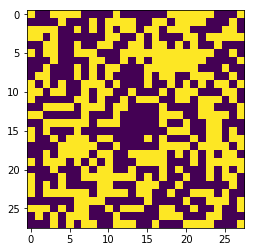

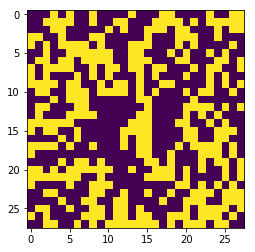

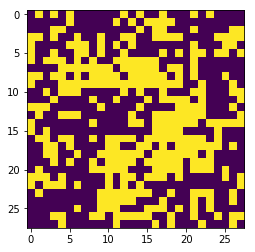

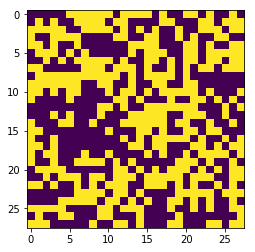

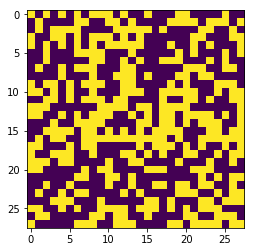

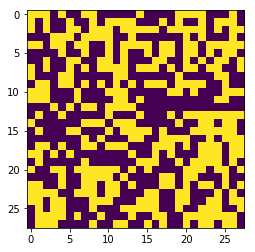

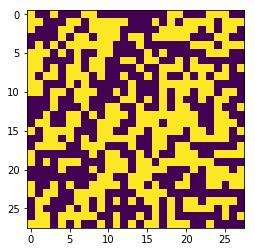

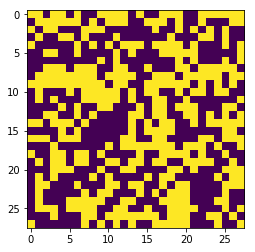

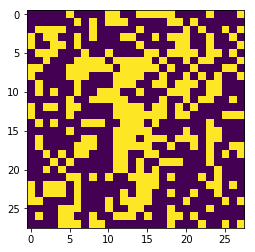

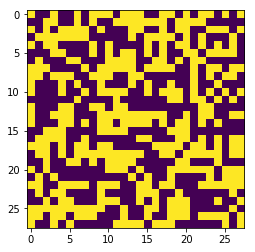

In [14]:
for x in fit_num:
    test_datapoint = x
    plt.imshow(test_datapoint.reshape(28, 28))
    plt.show()

In [16]:
# Now that numbers are generated, we'll check the accuracy again..
test = np.array(fit_num).reshape(10, 28, 28, 1)
r = model.predict(test)

for x in range(10):
    print("Accuracy for number {}: {}".format(x, r[x][x]))

Accuracy for number 0: 0.9931355714797974
Accuracy for number 1: 0.9990378618240356
Accuracy for number 2: 0.9991893172264099
Accuracy for number 3: 0.9972189664840698
Accuracy for number 4: 0.9967833757400513
Accuracy for number 5: 0.9919912219047546
Accuracy for number 6: 0.9938585162162781
Accuracy for number 7: 0.9937454462051392
Accuracy for number 8: 0.9999946355819702
Accuracy for number 9: 0.9929732084274292
